## <span style="font-family: Algerian; font-weight:bold;font-size:1.5em;color:Red; center">      Project on Unsupervised Machine Learning:

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Green;">Contents:

[Data Description](#Ds)

[Attribute Information](#AI)

[Objective](#O)

[Steps, Tasks and Solution](#sts)



<a id='the_destination'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Data Description
<a id='Ds'></a>
    <font color=darkblue>
        
- The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
        
        
-	Since the target variable is related to distinguishing type of vehicle/class of vehicle like Car, Van and Bus, the, true positive here will be recognizing correctly and the accuracy of the models will be calculated based upon the recognition of the vehicle. 
        
        
-	The data at hand contains geometrical features or silhouette of 846 types of vehicles present on road. Out of which three clusters can be made based upon the class such as Car, Bus and Van.
        

-	 The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
        
        
 </font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;">Attribute Information
<a id='AI'></a>
    <font color=darkblue> 
-	All the features are geometric features extracted from the silhouette. 
-	All are numeric in nature. 

        
	Compactness = (Avg. Perimeter) ^2 / Area
        
        
	Circularity = (Avg. Radius) ^2 / Area
        
	Distance Circularity = Area / (Avg. Distance from border) ^2
        
	Radius Ratio = (Max. Radius – Min. Radius) / Avg. Radius
        
	Pr. Axis Aspect ratio = (Minor Axis / Major Axis)
        
	Max. Length Aspect Ratio = (Length Perp Man Length) / (Man. Length)
        
	Scatter Ratio = (Inertia about Minor Axis) / (Inertia about Major Axis)
        
	Elongatedness = Area / (Shrink width) ^2
        
	Pr. Axis Rectangularity = Area / (Pr. Axis length * Pr. Axis Width)
        
	Max. Length Rectangularity = Area / (Max. length * Length perp. to this)
        
	Scaled Variance (Scaled variance along major axis) = (2nd order moment about major axis) / area
        
	Scaled Variance 1 (Scaled variance along minor axis) = (2nd order moment about minor axis) / area
        
	Scaled radius of Gyration = (Minor Variance + Minor Variance) / area
        
	Scaled radius of gyration.1: (3rd order moment about major axis) / (Sigma minor) ^3
        
	Skewness about: (3rd order moment about minor axis) / (Sigma Major) ^3
        
	Skewness about.1: (4th order moment about major axis) / (Sigma Minor) ^4
        
	Skewness about.2: (4th order moment about minor axis) / (Sigma Major) ^4
        
	Hollowness Ratio = (Area of Hollows) / (Area of bounding Polygon)

</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Objective
<a id='O'></a>
    <font color=darkblue> Main purpose is to classify the vehicles into the respective labels using the numerical attributes from the given geometric features extracted from Silhouette by applying dimensionlaity reduction technique - PCA and train a model using Principal components instead of training the model using just the raw data.
    </font>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:#00b3e5;"> Steps, Tasks and Solutions
<a id='sts'></a>
    <font color=red>
1. [Import the necessary libraries](#I)
        
2. [Read the data as a data frame and Preprocessing of the data](#R)
        
3. [Perform basic EDA](#EDA)
        
    * a. [Description of the dataset (general operations and statistical description)](#S)
        
    * b. [Univariate Analysis](#UV) 
        
    * c. [Multivariate analysis](#MV) 
        
    * d. [Bivariate analysis (some intrinsic columns)](#BV)
              
        
4. [Splitting of Dataset into training and testing & Scaling](#STT)
   
    
5. [Operation -1 With Support Vector Machine Classifier Algorithm after Scaling the Dataset](#O1SE)
        
    * a. [Train and test using Support Vector Machine Classifier Algorithm](#O1SVM) 
              
    * b. [Observations on accuracies ](#O1O) 
        
           
6. [Operation -2 With Support Vector Machine Classifier Algorithm after KFold CV Imputation](#O2SE)
        
    * a. [KFold CV - Model building and Testing without scaling the dataset](#O2KSVM) 
        
    * b. [KFold CV - Model building and Testing after scaling the dataset](#O2KSVM2) 
         
    * c. [Observations on accurices ](#O2O)
  
   
        
7. [Operation -3 With Support Vector Machine Classifier Algorithm after Feature Elimination based upon p-value and correlation](#O3SE)
        
    * a. [Feature Elimination](#O3FE) 
        
    * b. [Model building and Testing after feature elimination without scaling the dataset](#O3FESVM1) 
        
    * c. [Model building and Testing after feature elimination after scaling the dataset](#O3FESVM2) 
         
    * d. [Observations on accurices ](#O3O) 
                   

8. [Operation -4 With Support Vector Machine Classifier Algorithm after PCA Imputation & KFold CV](#O4SE)
        
    * a. [Principal components, their analysis, Eigen Vectors, Eigen Values, % of variation explaind by components](#O4PCA) 
        
    * b. [Model Building and Testing after PCA imputaion](#O4PCASVM)
        
    * c. [Model Building and Testing after PCA imputaion with KFold CV](#O4PCASVMKCV) 
         
    * d. [Observations on accurices ](#O4O) 
         
            
        
9. [Conclusion](#C)
     
</font>
    <a id='the_destination'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 1. Import the necessary libraries
<a id='I'></a>

In [3]:
# importing the necessary package for performing advanced mathematical operation

import pandas as pd
# importing the necessary package for managing data

import seaborn as sns

import matplotlib.pyplot as plt
# importing the necessary packages for visualisation

sns.set (color_codes = True) # it will add a nice background to the graphs
%matplotlib inline 
# commmand to tell Python to display my graphs
sns.set_style(style= 'darkgrid')

# pre-processing method
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# methods and classes for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings("ignore")

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 2. Read the data as a data frame
<a id='R'></a>

In [4]:
df = pd.read_csv('vehicle (1).csv')

In [5]:
df.head(20).T

0    1    2    3    4    5    6    7    8    9  \
compactness                   95   91  104   93   85  107   97   90   86   93   
circularity                   48   41   50   41   44  NaN   43   43   34   44   
distance_circularity          83   84  106   82   70  106   73   66   62   98   
radius_ratio                 178  141  209  159  205  172  173  157  140  NaN   
pr.axis_aspect_ratio          72   57   66   63  103   50   65   65   61   62   
max.length_aspect_ratio       10    9   10    9   52    6    6    9    7   11   
scatter_ratio                162  149  207  144  149  255  153  137  122  183   
elongatedness                 42   45   32   46   45   26   42   48   54   36   
pr.axis_rectangularity        20   19   23   19   19   28   19   18   17   22   
max.length_rectangularity    159  143  158  143  144  169  143  146  127  146   
scaled_variance              176  170  223  160  241  280  176  162  141  202   
scaled_variance.1            379  330  635  309  325  957  361  281  223  505   
scaled_radius_of_gyration    184  158  220  127  188  264  172  164  112  152   
scaled_radius_of_gyration.1   70   72   73   63  127   85   66   67   64   64   
skewness_about                 6    9   14    6    9    5   13    3    2    4   
skewness_about.1              16   14    9   10   11    9    1    3   14   14   
skewness_about.2             187  189  188  199  180  181  200  193  200  195   
hollows_ratio                197  199  196  207  183  183  204  202  208  204   
class                        van  van  car  van  bus  bus  bus  van  van  car   

                              10   11   12   13   14   15   16   17   18   19  
compactness                   86   90   88   89   94   96   89   99  104  101  
circularity                   36   34   46   42   49   55   36   41   54   56  
distance_circularity          70   66   74   85   79  103   51   77  100  100  
radius_ratio                 143  136  171  144  203  201  109  197  186  215  
pr.axis_aspect_ratio          61   55   68   58   71   65   52   69   61  NaN  
max.length_aspect_ratio        9    6    6   10    5    9    6    6   10   10  
scatter_ratio                133  123  152  152  174  204  118  177  216  208  
elongatedness                 50   54   43   44   37   32   57   36   31   32  
pr.axis_rectangularity        18   17   19   19   21   23   17   21   24   24  
max.length_rectangularity    130  118  148  144  154  166  129  139  173  169  
scaled_variance              153  148  180  173  196  227  137  202  225  227  
scaled_variance.1            266  224  349  345  465  624  206  485  686  651  
scaled_radius_of_gyration    127  118  192  161  206  246  125  151  220  223  
scaled_radius_of_gyration.1   66   65   71   72   71   74   80   72   74   74  
skewness_about                 2    5    5    8    6    6    2    4    5    6  
skewness_about.1              10   26   11   13    2    2   14   10   11    5  
skewness_about.2             194  196  189  187  197  186  181  198  185  186  
hollows_ratio                202  202  195  197  199  194  185  199  195  193  
class                        van  car  bus  van  bus  car  van  bus  car  car

In [6]:
df.tail(20).T

826  827  828  829  830  831  832  833  834  \
compactness                   95   99   89   95   97  100  108   92   82   
circularity                   49   57   42   49   37   47   49   46   36   
distance_circularity          92  100   66   82   70   70  109   83   51   
radius_ratio                 193  177  125  139  173  185  204  154  114   
pr.axis_aspect_ratio          62   54   53   56   66   70   61   56   53   
max.length_aspect_ratio       10   13    7   11    7    7   11    6    4   
scatter_ratio                178  224  131  159  151  162  212  160  135   
elongatedness                 37   30   51   43   43   40   31   41   50   
pr.axis_rectangularity        21   25   18   20   19   20   24   20   18   
max.length_rectangularity    154  188  144  162  129  153  159  148  126   
scaled_variance              200  223  162  173  167  179  229  185  150   
scaled_variance.1            478  726  254  365  346  406  665  382  268   
scaled_radius_of_gyration    171  213  162  185  119  172  215  184  144   
scaled_radius_of_gyration.1   64   72   73   75   65   68   71   71   86   
skewness_about                 2    4   10    7    0    9   16   10   15   
skewness_about.1               0    7   17   10   16    6   11    5    4   
skewness_about.2             198  185  188  182  201  200  190  186  181   
hollows_ratio                206  198  191  191  208  205  199  191  182   
class                        car  car  van  van  bus  bus  car  car  car   

                              835  836  837  838  839  840  841  842  843  \
compactness                   111   87   94   95   90   93   93   89  106   
circularity                    58   45   46   43   44   34   39   46   54   
distance_circularity          105   66   77   76   72   66   87   84  101   
radius_ratio                  183  139  169  142  157  140  183  163  222   
pr.axis_aspect_ratio           51   58   60   57   64   56   64   66   67   
max.length_aspect_ratio         6    8    8   10    8    7    8   11   12   
scatter_ratio                 265  140  158  151  137  130  169  159  222   
elongatedness                  26   47   42   44   48   51   40   43   30   
pr.axis_rectangularity         29   18   20   19   18   18   20   20   25   
max.length_rectangularity     174  148  148  149  144  120  134  159  173   
scaled_variance               285  168  181  173  159  151  200  173  228   
scaled_variance.1            1018  294  373  339  283  251  422  368  721   
scaled_radius_of_gyration     255  175  181  159  171  114  149  176  200   
scaled_radius_of_gyration.1    85   73   67   71   65   62   72   72   70   
skewness_about                  4    3   12    2    9    5    7    1    3   
skewness_about.1                8   12    2   23    4   29   25   20    4   
skewness_about.2              181  188  193  187  196  201  188  186  187   
hollows_ratio                 183  196  199  200  203  207  195  197  201   
class                         bus  van  car  van  van  car  car  van  car   

                             844  845  
compactness                   86   85  
circularity                   36   36  
distance_circularity          78   66  
radius_ratio                 146  123  
pr.axis_aspect_ratio          58   55  
max.length_aspect_ratio        7    5  
scatter_ratio                135  120  
elongatedness                 50   56  
pr.axis_rectangularity        18   17  
max.length_rectangularity    124  128  
scaled_variance              155  140  
scaled_variance.1            270  212  
scaled_radius_of_gyration    148  131  
scaled_radius_of_gyration.1   66   73  
skewness_about                 0    1  
skewness_about.1              25   18  
skewness_about.2             190  186  
hollows_ratio                195  190  
class                        car  van

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 3. Performing basic Exploratory Data Analysis (EDA) 
<a id='EDA'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.a. Statistical Description of the dataset, with preprocessing
<a id='S'></a>

In [7]:
def indetailtable(df):
    print(f'Dataset Shape: {df.shape}')
    print('Total Number of rows in dataset= {}'.format(df.shape[0]))
    print('Total Number of columns in dataset= {}'.format(df.shape[1]))
    print('Various datatypes present in the dataset are: {}\n'.format(df.dtypes.value_counts()))
    
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary['Name'] = summary[['Name', 'dtypes']]
    summary['Misssing_values'] = df.isnull().sum().values
    summary['Unique_values'] = df.nunique().values
    summary['Duplicate_values'] = df.duplicated().sum()
    summary['1st value'] = df.loc[0].values
    summary['2nd Value'] = df.loc[1].values
    summary['844th Value'] = df.loc[843].values
    summary['845th Value'] = df.loc[844].values
    
    return summary

In [8]:
brief = indetailtable(df)
brief

Dataset Shape: (846, 19)
Total Number of rows in dataset= 846
Total Number of columns in dataset= 19
Various datatypes present in the dataset are: float64    14
int64       4
object      1
dtype: int64



index   dtypes                         Name  \
0                   compactness    int64                  compactness   
1                   circularity  float64                  circularity   
2          distance_circularity  float64         distance_circularity   
3                  radius_ratio  float64                 radius_ratio   
4          pr.axis_aspect_ratio  float64         pr.axis_aspect_ratio   
5       max.length_aspect_ratio    int64      max.length_aspect_ratio   
6                 scatter_ratio  float64                scatter_ratio   
7                 elongatedness  float64                elongatedness   
8        pr.axis_rectangularity  float64       pr.axis_rectangularity   
9     max.length_rectangularity    int64    max.length_rectangularity   
10              scaled_variance  float64              scaled_variance   
11            scaled_variance.1  float64            scaled_variance.1   
12    scaled_radius_of_gyration  float64    scaled_radius_of_gyration   
13  scaled_radius_of_gyration.1  float64  scaled_radius_of_gyration.1   
14               skewness_about  float64               skewness_about   
15             skewness_about.1  float64             skewness_about.1   
16             skewness_about.2  float64             skewness_about.2   
17                hollows_ratio    int64                hollows_ratio   
18                        class   object                        class   

    Misssing_values  Unique_values  Duplicate_values 1st value 2nd Value  \
0                 0             44                 0        95        91   
1                 5             27                 0        48        41   
2                 4             63                 0        83        84   
3                 6            134                 0       178       141   
4                 2             37                 0        72        57   
5                 0             21                 0        10         9   
6                 1            131                 0       162       149   
7                 1             35                 0        42        45   
8                 3             13                 0        20        19   
9                 0             66                 0       159       143   
10                3            128                 0       176       170   
11                2            422                 0       379       330   
12                2            143                 0       184       158   
13                4             39                 0        70        72   
14                6             23                 0         6         9   
15                1             41                 0        16        14   
16                1             30                 0       187       189   
17                0             31                 0       197       199   
18                0              3                 0       van       van   

   844th Value 845th Value  
0          106          86  
1           54          36  
2          101          78  
3          222         146  
4           67          58  
5           12           7  
6          222         135  
7           30          50  
8           25          18  
9          173         124  
10         228         155  
11         721         270  
12         200         148  
13          70          66  
14           3           0  
15           4          25  
16         187         190  
17         201         195  
18         car         car

### *Comments:*


<font color = blue>

- There are basically 845 number of data points / observations and 19 number of columns/features present in the dataset.

- Out of which 14 number of rows are of float64 data type, four are integer (int64), and one is object. The column ‘Class’ is object datatype in nature and it contains three unique names in it such as van, bus and car.

- There are lot of missing values present in the dataset, so we need to perform appropriate operation to avoid presence of missing values and their adverse effect on the model performance.

- Similarly, there are no duplicate values present in the dataset, so it can also be treated as clean in terms of duplicate values.

- Except the class column which is our target column, all other columns are filled with many number of unique values.

- The status column which is object in terms of datatype has three unique values such as Van, Car and Bus. 

In [9]:
# We will encode the Categorical Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
label_encoder = LabelEncoder()
df.iloc[:,18] = label_encoder.fit_transform(df.iloc[:,18]).astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [12]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [13]:
df=df.rename(columns = {'pr.axis_aspect_ratio':'pr_axis_aspect_ratio', 'max.length_aspect_ratio':'max_length_aspect_ratio',
                        'pr.axis_rectangularity':'pr_axis_rectangularity', 'max.length_rectangularity':'max_length_rectangularity',
                       'scaled_variance.1':'scaled_variance_1', 'scaled_radius_of_gyration.1':'scaled_radius_of_gyration_1',
                       'skewness_about.1':'skewness_about_1', 'skewness_about.2':'skewness_about_2'})
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')

In [14]:
for value in ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class']:
    print(value,':', sum(df[value] == '?'))

compactness : 0
circularity : 0
distance_circularity : 0
radius_ratio : 0
pr_axis_aspect_ratio : 0
max_length_aspect_ratio : 0
scatter_ratio : 0
elongatedness : 0
pr_axis_rectangularity : 0
max_length_rectangularity : 0
scaled_variance : 0
scaled_variance_1 : 0
scaled_radius_of_gyration : 0
scaled_radius_of_gyration_1 : 0
skewness_about : 0
skewness_about_1 : 0
skewness_about_2 : 0
hollows_ratio : 0
class : 0


- We don't have '?' symbol in the dataset

## Dealing with missing values

In [15]:
# Any of the values in the dataframe is a missing Value?
df.isnull().values.any()

True

In [16]:
# total number of missing values present in the entire dataframe..
df.isnull().sum().sum()

41

In [17]:
# Replacing NaN with the mean of the column
df['circularity'].fillna(df.circularity.mean(),inplace = True)

In [18]:
# Replacing NaN with the mean of the column
df['distance_circularity'].fillna(df.distance_circularity.mean(),inplace = True)

In [19]:
# Replacing NaN with the mean of the column
df['radius_ratio'].fillna(df.radius_ratio.mean(),inplace = True)

In [20]:
# Replacing NaN with the mean of the column
df['pr_axis_aspect_ratio'].fillna(df.pr_axis_aspect_ratio.mean(),inplace = True)

In [21]:
# Replacing NaN with the mean of the column
df['scatter_ratio'].fillna(df.scatter_ratio.mean(),inplace = True)

In [22]:
# Replacing NaN with the mean of the column
df['pr_axis_rectangularity'].fillna(df.pr_axis_rectangularity.mean(),inplace = True)

In [23]:
# Replacing NaN with the mean of the column
df['scaled_variance'].fillna(df.scaled_variance.mean(),inplace = True)

In [24]:
# Replacing NaN with the mean of the column
df['scaled_variance_1'].fillna(df.scaled_variance_1.mean(),inplace = True)

In [25]:
# Replacing NaN with the mean of the column
df['scaled_radius_of_gyration'].fillna(df.scaled_radius_of_gyration.mean(),inplace = True)

In [26]:
# Replacing NaN with the mean of the column
df['scaled_radius_of_gyration_1'].fillna(df.scaled_radius_of_gyration_1.mean(),inplace = True)

In [27]:
# Replacing NaN with the mean of the column
df['skewness_about'].fillna(df.skewness_about.mean(),inplace = True)

In [28]:
# Replacing NaN with the mean of the column
df['skewness_about_1'].fillna(df.skewness_about_1.mean(),inplace = True)

In [29]:
# Replacing NaN with the mean of the column
df['skewness_about_2'].fillna(df.skewness_about_2.mean(),inplace = True)

In [30]:
# Replacing NaN with the mean of the column
df['elongatedness'].fillna(df.elongatedness.mean(),inplace = True)

In [31]:
# Any of the values in the dataframe is a missing Value?
df.isnull().values.any()

False

In [32]:
# total number of missing values present in the entire dataframe..
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

- Now the dataset is free from missing values. 
- Hence, it is now ready for statistical analysis. 

In [33]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr_axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max_length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr_axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max_length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance_1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration_1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about_1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about_2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr_axis_aspect_ratio          61.0   65.00   138.0  
max_length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr_axis_rectangularity        20.0   23.00    29.0  
max_length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance_1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration_1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about_1              11.0   19.00    41.0  
skewness_about_2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

### *Comments:*


<font color = blue>
    
    
In the above table 5 point summary have been described, i.e., minimum value, 25%, 50%, 75%, and maximum value.

•	In the above statistical distribution analysis, it is noticed that, most of the features are having unique values and have a unique distribution.

•	Each columns do have different units or scales. Some of the columns indicate measure of  normal dimensions and some are ratios. Thus these columns have unique values and unique distribution as per their scales.

•	The target column which is trinomial in nature has three categories or classes such as 0,1,2 for Bus, Car and Van respectively.


Further Checking individually

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.b. Univariate Analysis 
<a id='UV'></a>

<font Color = green>
    
### Univariate Analysis for Target Column

In [34]:
# Checking the value of counts for Status of PD
pd.value_counts(df['class'])

1.0    429
0.0    218
2.0    199
Name: class, dtype: int64

Here
- 0.0 stands for Bus, 
- 1.0 stands for Car, and 
- 2.0 stands for Van

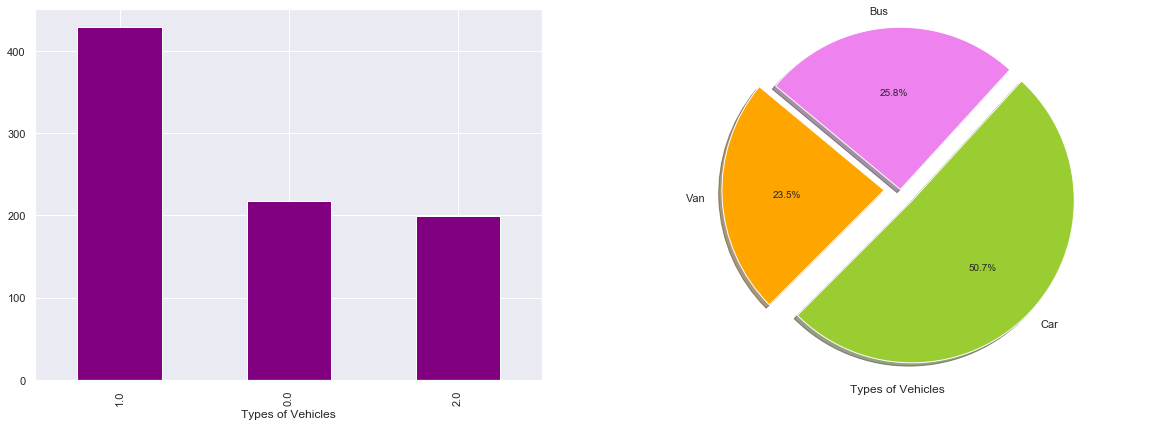

In [35]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)

pd.value_counts(df['class']).plot(kind = 'bar', color = 'purple'); # to plot a bar chart
plt.xlabel('Types of Vehicles');

plt.subplot(2,2,2)
# Data to plot
labels = 'Car', 'Bus', 'Van'
sizes = [429, 218, 199]
colors = ['yellowgreen', 'violet', 'orange']
explode = (0.1, 0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes,explode=explode, labels=labels, colors=colors, # to plot a pie chart
 autopct='%1.1f%%',shadow=True, startangle= - 135)
plt.xlabel('Types of Vehicles');
plt.axis('equal')
plt.show()

In [36]:
df.groupby(['class']).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
0.0            218          218                   218           218   
1.0            429          429                   429           429   
2.0            199          199                   199           199   

       pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
class                                                                 
0.0                     218                      218            218   
1.0                     429                      429            429   
2.0                     199                      199            199   

       elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
class                                                                     
0.0              218                     218                        218   
1.0              429                     429                        429   
2.0              199                     199                        199   

       scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
class                                                                  
0.0                218                218                        218   
1.0                429                429                        429   
2.0                199                199                        199   

       scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
class                                                                  
0.0                            218             218               218   
1.0                            429             429               429   
2.0                            199             199               199   

       skewness_about_2  hollows_ratio  
class                                   
0.0                 218            218  
1.0                 429            429  
2.0                 199            199

### *Observations on Target Column:*


<font color = blue>
    
> Out of all the vehicle 50.7% are of Car, 23.5% are of van and 25.8% are of bus category.

> The dataset is skewed in terms of target column, due to the uneven distribution of class of vehicles between car, bus and van. Car seems to be more on road than bas and van together.

> And, here the main target or class of interest is to correctly identify the car, bus and van from their geometrical configuration.

> Here, we do not want to misclassify any car as bus or van or vice versa, which may lead to bias the model during production. Thus our main aim is to minimize both type I and Type II error.


<font Color = green>
    
### Univariate Analysis for Independent Columns like compactness, circularity, elongatedness, scaled_variance, scaled_radius_of_gyration, pr_axis_rectangularity, pr_axis_aspect_ratio, scatter_ratio 

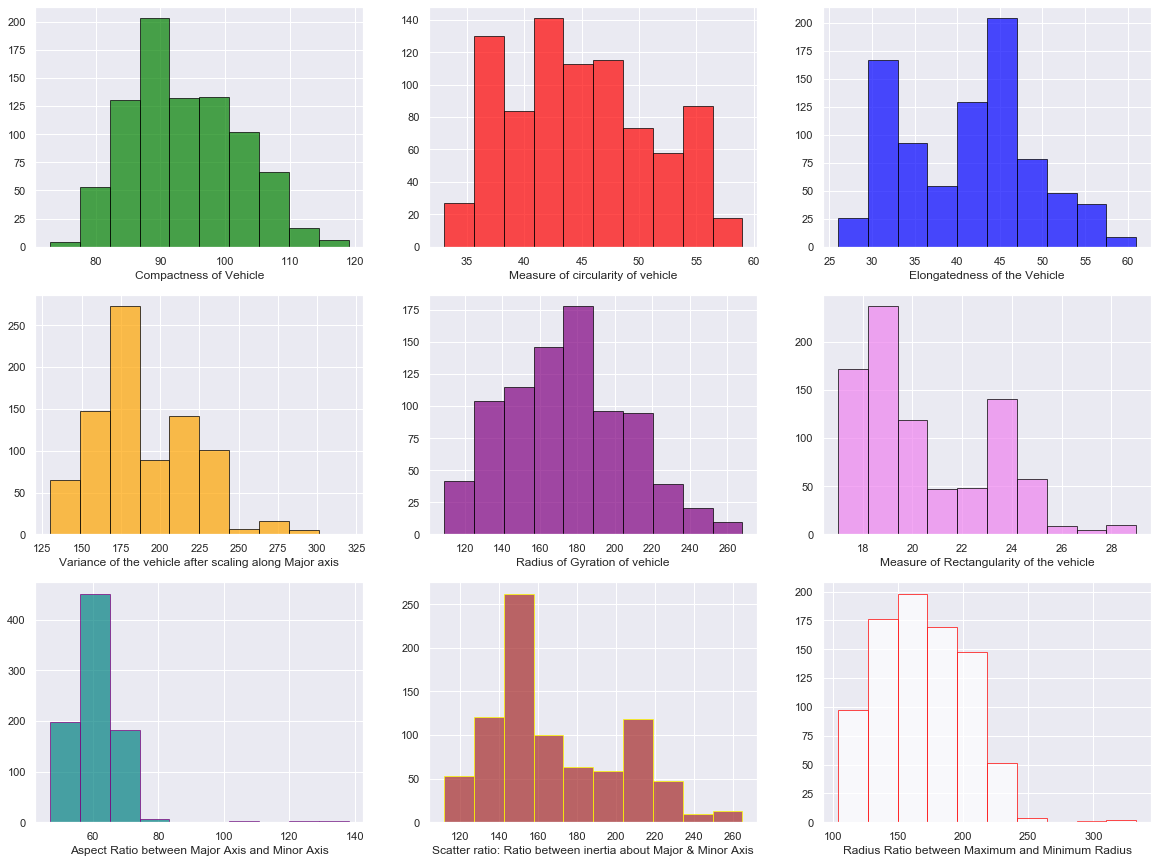

In [37]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.compactness, color = 'green', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Compactness of Vehicle')

plt.subplot(3,3,2)
plt.hist(df.circularity, color = 'red', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Measure of circularity of vehicle')

plt.subplot(3,3,3)
plt.hist(df.elongatedness, color = 'blue', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Elongatedness of the Vehicle') 

plt.subplot(3,3,4)
plt.hist(df.scaled_variance, color = 'orange', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Variance of the vehicle after scaling along Major axis') 

plt.subplot(3,3,5)
plt.hist(df.scaled_radius_of_gyration, color = 'purple', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Radius of Gyration of vehicle') 

plt.subplot(3,3,6)
plt.hist(df.pr_axis_rectangularity, color = 'violet', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Measure of Rectangularity of the vehicle') ;

plt.subplot(3,3,7)
plt.hist(df.pr_axis_aspect_ratio, color = 'teal', edgecolor = 'purple', alpha = 0.7);
plt.xlabel('Aspect Ratio between Major Axis and Minor Axis') ;

plt.subplot(3,3,8)
plt.hist(df.scatter_ratio, color = 'brown', edgecolor = 'yellow', alpha = 0.7);
plt.xlabel('Scatter ratio: Ratio between inertia about Major & Minor Axis') ;

plt.subplot(3,3,9)
plt.hist(df.radius_ratio, color = 'white', edgecolor = 'red', alpha = 0.7);
plt.xlabel('Radius Ratio between Maximum and Minimum Radius');

Comments:



<font color = blue>
- From above all histogram plots for various independent attributes it can be observed that none of them are normally distributed. 
    
- Though the aspect ratio column seems to be normally distributed, it is highly skewed towards right. Some of the attributes are multimodal in nature and it can be due to the mixing of Gaussian at different point of data collection.


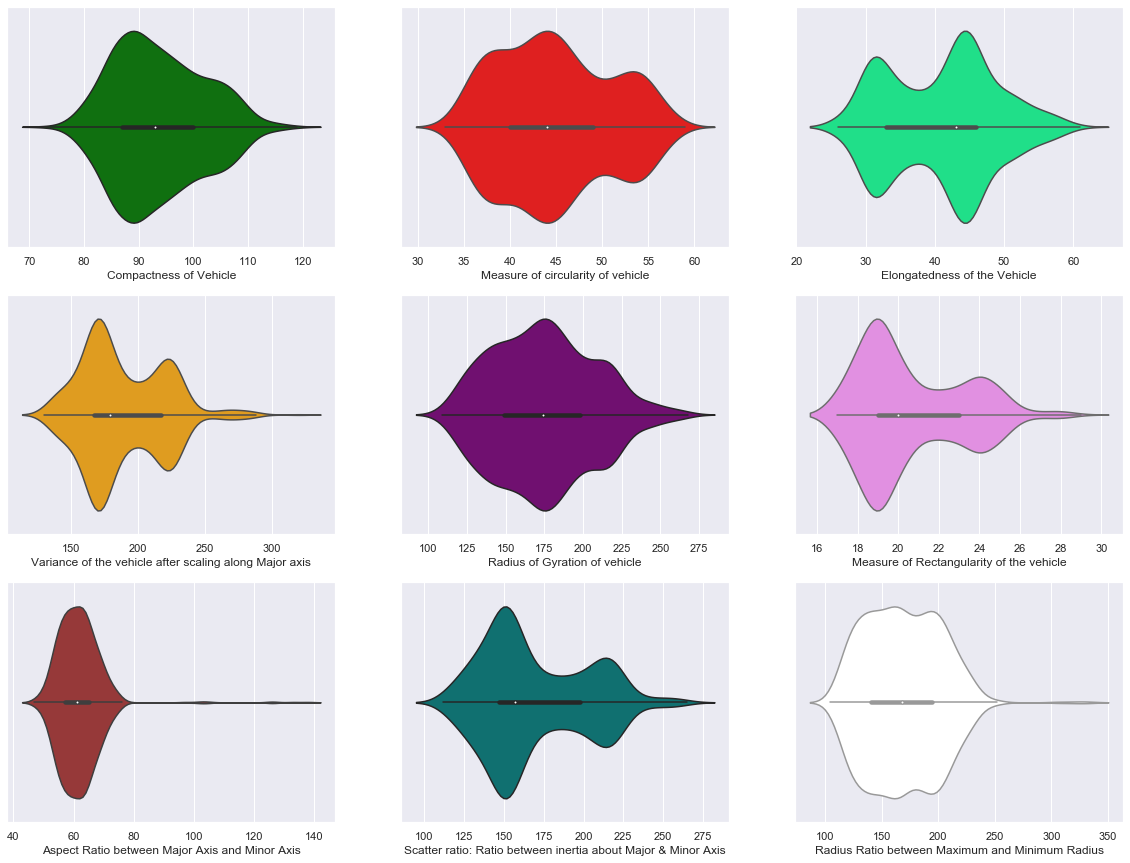

In [38]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.violinplot(df['compactness'], color = 'green')
plt.xlabel('Compactness of Vehicle')

plt.subplot(3,3,2)
sns.violinplot(df['circularity'], color = 'red')
plt.xlabel('Measure of circularity of vehicle')

plt.subplot(3,3,3)
sns.violinplot(df['elongatedness'], palette = 'gist_rainbow')
plt.xlabel('Elongatedness of the Vehicle') 

plt.subplot(3,3,4)
sns.violinplot(df['scaled_variance'], color = 'orange')
plt.xlabel('Variance of the vehicle after scaling along Major axis') 


plt.subplot(3,3,5)
sns.violinplot(df['scaled_radius_of_gyration'], color = 'purple')
plt.xlabel('Radius of Gyration of vehicle') 

plt.subplot(3,3,6)
sns.violinplot(df['pr_axis_rectangularity'], color = 'violet')
plt.xlabel('Measure of Rectangularity of the vehicle') ;

plt.subplot(3,3,7)
sns.violinplot(df['pr_axis_aspect_ratio'], color = 'brown')
plt.xlabel('Aspect Ratio between Major Axis and Minor Axis') ;

plt.subplot(3,3,8)
sns.violinplot(df['scatter_ratio'], color = 'teal')
plt.xlabel('Scatter ratio: Ratio between inertia about Major & Minor Axis') ;

plt.subplot(3,3,9)
sns.violinplot(df['radius_ratio'], color = 'white')
plt.xlabel('Radius Ratio between Maximum and Minimum Radius');


<font color = blue>
    
- From the above Violin plot, it can be inferred that, the columns 'Aspect ratio', 'scatter ratio' and 'radius ratio' are highly right skewed. 'Scaled variance' also seems to be right skewed. 

- A clear bimodal distribution curve can also be observed for the columns like 'Scaled Variance along Major axis', 'scatter ratio', 'Rectangularity measurement' and 'elongatedness' of the vehicle.
    
- However, the order of modality among all these columns is not uniform. The aspect ratio attribute seems to be Normally distributed but it is again right skewed.

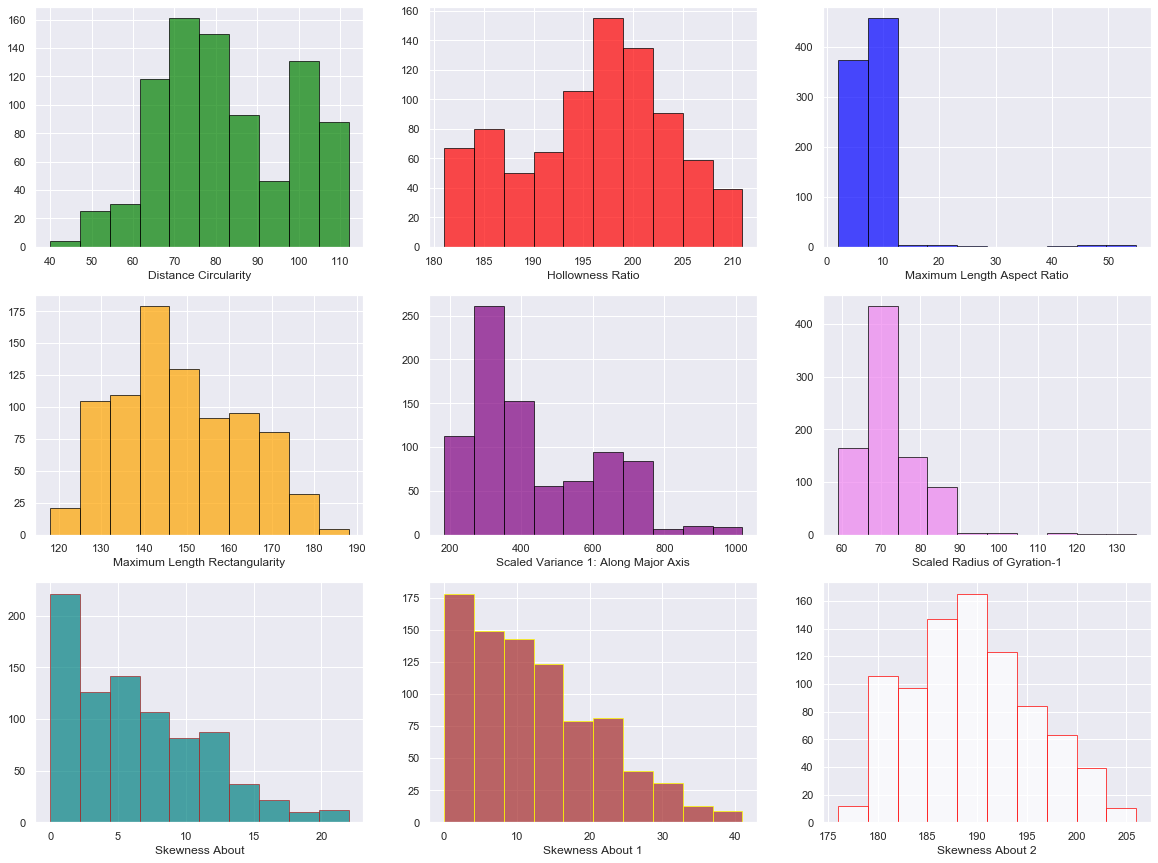

In [39]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.distance_circularity, color = 'green', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Distance Circularity')

plt.subplot(3,3,2)
plt.hist(df.hollows_ratio, color = 'red', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Hollowness Ratio')

plt.subplot(3,3,3)
plt.hist(df.max_length_aspect_ratio, color = 'blue', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Maximum Length Aspect Ratio') 

plt.subplot(3,3,4)
plt.hist(df.max_length_rectangularity, color = 'orange', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Maximum Length Rectangularity') 

plt.subplot(3,3,5)
plt.hist(df.scaled_variance_1, color = 'purple', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Scaled Variance 1: Along Major Axis') 

plt.subplot(3,3,6)
plt.hist(df.scaled_radius_of_gyration_1, color = 'violet', edgecolor = 'black', alpha = 0.7);
plt.xlabel('Scaled Radius of Gyration-1') ;

plt.subplot(3,3,7)
plt.hist(df.skewness_about, color = 'teal', edgecolor = 'brown', alpha = 0.7);
plt.xlabel('Skewness About') ;

plt.subplot(3,3,8)
plt.hist(df.skewness_about_1, color = 'brown', edgecolor = 'yellow', alpha = 0.7);
plt.xlabel('Skewness About 1') ;

plt.subplot(3,3,9)
plt.hist(df.skewness_about_2, color = 'white', edgecolor = 'red', alpha = 0.7);
plt.xlabel('Skewness About 2') ;




<font color = blue>
    
- From the above histogram plot, inference can be drawn as follows: none of the columns are normally distributed. Though the column for 'maximum rectangularity' seems to be distributed normally, it is little bit right skewed. 
    
- Columns like 'Distance Circularity', 'Hollowness ratio', 'Maximum length rectangularity', 'skewness about-2' are having abundant amount of data points and can be expected to influence the target column. 

- Some of the columns like 'maximum length aspect ratio', 'scaled radius of gyratio-1' do not have much data points, and can be seen as right skewed. A discontinuity during the distribution period says the presence of outliers in those columns. it means these kind of columns can bias the target attribute and can also hamper the model performance in production.


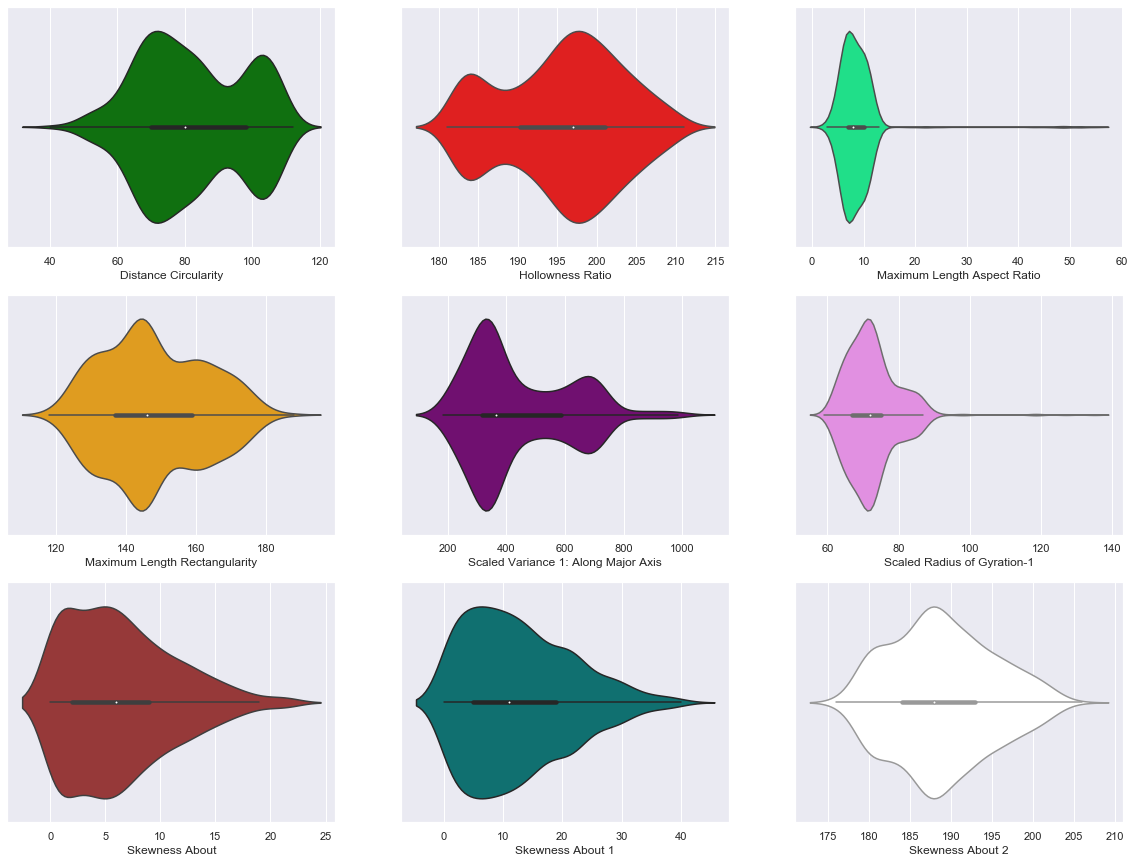

In [40]:
# Plotting the distribution of continous features individually

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.violinplot(df['distance_circularity'], color = 'green')
plt.xlabel('Distance Circularity')

plt.subplot(3,3,2)
sns.violinplot(df['hollows_ratio'], color = 'red')
plt.xlabel('Hollowness Ratio')

plt.subplot(3,3,3)
sns.violinplot(df['max_length_aspect_ratio'], palette = 'gist_rainbow')
plt.xlabel('Maximum Length Aspect Ratio') 

plt.subplot(3,3,4)
sns.violinplot(df['max_length_rectangularity'], color = 'orange')
plt.xlabel('Maximum Length Rectangularity') 

plt.subplot(3,3,5)
sns.violinplot(df['scaled_variance_1'], color = 'purple')
plt.xlabel('Scaled Variance 1: Along Major Axis') 

plt.subplot(3,3,6)
sns.violinplot(df['scaled_radius_of_gyration_1'], color = 'violet')
plt.xlabel('Scaled Radius of Gyration-1') ;

plt.subplot(3,3,7)
sns.violinplot(df['skewness_about'], color = 'brown')
plt.xlabel('Skewness About') ;

plt.subplot(3,3,8)
sns.violinplot(df['skewness_about_1'], color = 'teal')
plt.xlabel('Skewness About 1') ;

plt.subplot(3,3,9)
sns.violinplot(df['skewness_about_2'], color = 'white')
plt.xlabel('Skewness About 2');

<font color = blue>
    
- From the above violin plot the inference drawn are as follows: Bimodal distribution can be observed in'Distance Circularity', 'Hollowness ratio' and 'scaled variance 1' along major axis, though the degree of modal is not same among all. The bimodal distribution curve shows the mixing of Gaussian, and also signifies a little amount of outliers. 
    

- Distribution in the columns like 'Skewness about' and 'skewness about 1'can be treated as right skewed and also shows the presence of outliers. Distribution along 'Maximum length aspect ratio' and 'scaled radius of gyration1' seems to be weird, and can be due presence of outliers.

In [41]:
# for doing statistical calculation
import scipy
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import scipy.stats as stats
from scipy.stats import skew

# Preparing a pandas dataframe to store the skewness of each column.
Skewness = pd.DataFrame({'Skewness': [stats.skew(df.compactness), stats.skew(df.circularity), 
                                      stats.skew(df.distance_circularity),stats.skew(df.radius_ratio), 
                                      stats.skew(df.pr_axis_aspect_ratio), stats.skew(df.max_length_aspect_ratio),
                                      stats.skew(df.scatter_ratio),stats.skew(df.elongatedness), 
                                      stats.skew(df.pr_axis_rectangularity),stats.skew(df.max_length_rectangularity), 
                                      stats.skew(df.scaled_variance),stats.skew(df.scaled_variance_1),
                                      stats.skew(df.scaled_radius_of_gyration), stats.skew(df.scaled_radius_of_gyration_1),
                                      stats.skew(df.skewness_about), stats.skew(df.skewness_about_1), 
                                      stats.skew(df.skewness_about_2), stats.skew(df.hollows_ratio)]}, 
                        index = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr_axis_aspect_ratio', 
                                 'max_length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr_axis_rectangularity', 
                                 'max_length_rectangularity','scaled_variance', 'scaled_variance_1', 
                                 'scaled_radius_of_gyration','scaled_radius_of_gyration_1', 'skewness_about',
                                 'skewness_about_1','skewness_about_2','hollows_ratio'])
Skewness

Skewness
compactness                  0.380594
circularity                  0.262118
distance_circularity         0.106647
radius_ratio                 0.395678
pr_axis_aspect_ratio         3.828079
max_length_aspect_ratio      6.766369
scatter_ratio                0.606551
elongatedness                0.047790
pr_axis_rectangularity       0.770884
max_length_rectangularity    0.255904
scaled_variance              0.651595
scaled_variance_1            0.841532
scaled_radius_of_gyration    0.279151
scaled_radius_of_gyration_1  2.084717
skewness_about               0.777895
skewness_about_1             0.687202
skewness_about_2             0.249025
hollows_ratio               -0.225940

<font color = blue>
    
- Columns like 'pr axis aspect ratio', 'max length aspect ratio' and 'scaled radius of gyration 1' are highly skewed towards right. This can be due to the presence of outliers in the independent columns. Out of all the columns, 'hollowness ratio' is only left skewed and this skewness can be overlooked during model building.

<font color = teal>

### * Now to check the presence of outliers, box plot can be drawn for independent continous variables

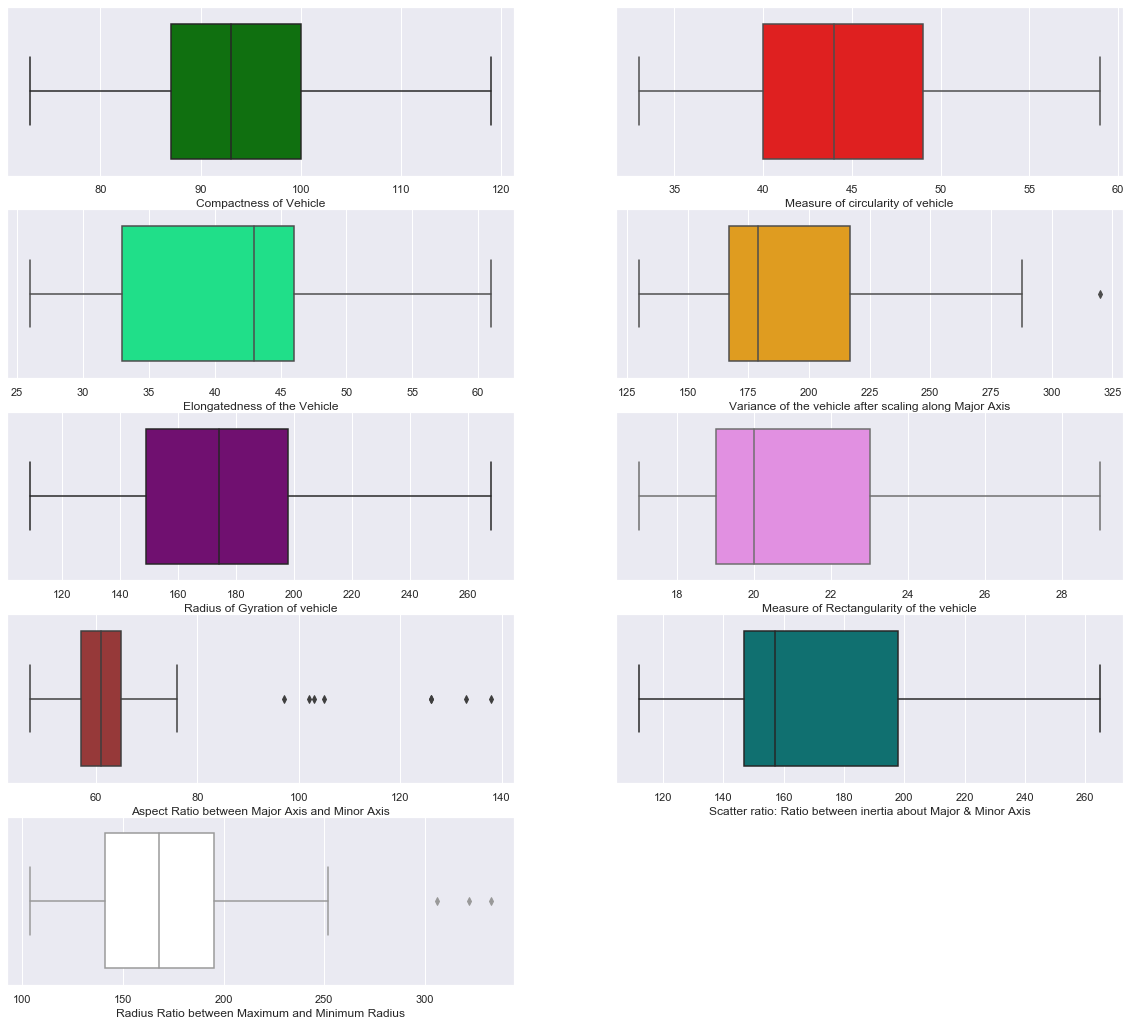

In [42]:
plt.figure(figsize = (20,18))
plt.subplot(5,2,1)
sns.boxplot(x = df.compactness, color = 'green')
plt.xlabel('Compactness of Vehicle')

plt.subplot(5,2,2)
sns.boxplot(x = df.circularity, color = 'red')
plt.xlabel('Measure of circularity of vehicle')

plt.subplot(5,2,3)
sns.boxplot(x = df.elongatedness,palette = 'gist_rainbow')
plt.xlabel('Elongatedness of the Vehicle') 

plt.subplot(5,2,4)
sns.boxplot(x = df.scaled_variance, color = 'orange')
plt.xlabel('Variance of the vehicle after scaling along Major Axis') 

plt.subplot(5,2,5)
sns.boxplot(x = df.scaled_radius_of_gyration, color = 'purple')
plt.xlabel('Radius of Gyration of vehicle') 

plt.subplot(5,2,6)
sns.boxplot(x = df.pr_axis_rectangularity, color = 'violet')
plt.xlabel('Measure of Rectangularity of the vehicle') ;

plt.subplot(5,2,7)
sns.boxplot(x = df.pr_axis_aspect_ratio, color = 'brown')
plt.xlabel('Aspect Ratio between Major Axis and Minor Axis') ;

plt.subplot(5,2,8)
sns.boxplot(x = df.scatter_ratio, color = 'teal')
plt.xlabel('Scatter ratio: Ratio between inertia about Major & Minor Axis') ;

plt.subplot(5,2,9)
sns.boxplot(x = df.radius_ratio, color = 'white')
plt.xlabel('Radius Ratio between Maximum and Minimum Radius');

<font color = blue>
    
- The inferences drawn from the above box plots as follows: Most of the columns are not affected by outliers except a few. As seen from the above histogram and violin plots the column 'pr axis aspect ratio' i.e. the aspect ratio between major axis and minor axis has been affected by outliers and a proper pre-processing can be imputed to the column in order to enhance the performance of the model. The columns like 'scaled variance' and 'radius ratio' are also been affected by outliers however the effect will not be that much sound on model accuracy.
    
    
- In addition, all the columns are not distributed uniformly, the median value of some of the columns are shifted towards right and for some of them median is situated towards left, it means for some of the columns 25% quantile has more data points and for some 75% quantile has more data points.


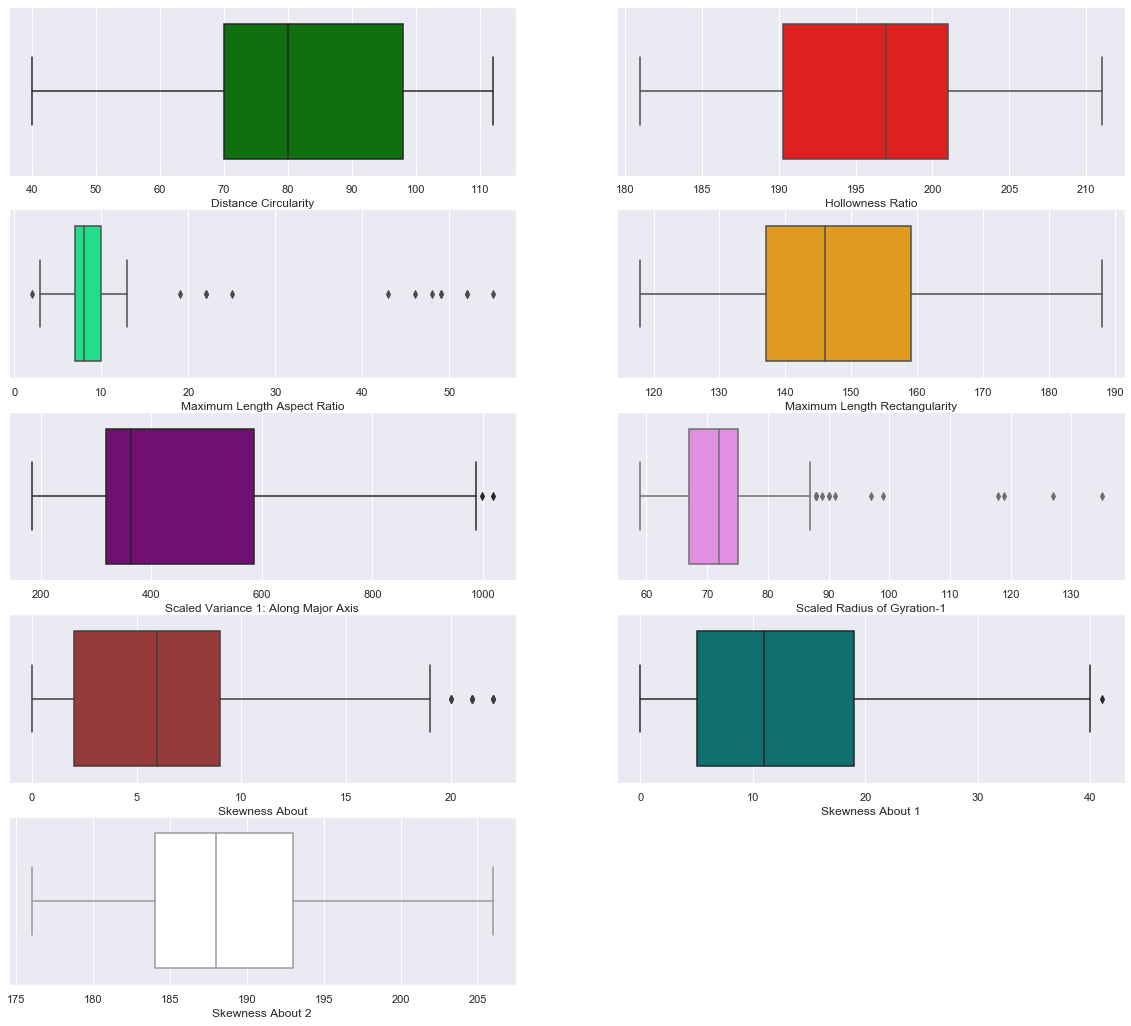

In [43]:
plt.figure(figsize = (20,18))
plt.subplot(5,2,1)
sns.boxplot(x = df.distance_circularity, color = 'green')
plt.xlabel('Distance Circularity')

plt.subplot(5,2,2)
sns.boxplot(x = df.hollows_ratio, color = 'red')
plt.xlabel('Hollowness Ratio')

plt.subplot(5,2,3)
sns.boxplot(x = df.max_length_aspect_ratio, palette = 'gist_rainbow')
plt.xlabel('Maximum Length Aspect Ratio') 

plt.subplot(5,2,4)
sns.boxplot(x = df.max_length_rectangularity, color = 'orange')
plt.xlabel('Maximum Length Rectangularity') 

plt.subplot(5,2,5)
sns.boxplot(x = df.scaled_variance_1, color = 'purple')
plt.xlabel('Scaled Variance 1: Along Major Axis') 

plt.subplot(5,2,6)
sns.boxplot(x = df.scaled_radius_of_gyration_1, color = 'violet')
plt.xlabel('Scaled Radius of Gyration-1') ;

plt.subplot(5,2,7)
sns.boxplot(x = df.skewness_about, color = 'brown')
plt.xlabel('Skewness About') ;

plt.subplot(5,2,8)
sns.boxplot(x = df.skewness_about_1, color = 'teal')
plt.xlabel('Skewness About 1') ;

plt.subplot(5,2,9)
sns.boxplot(x = df.skewness_about_2, color = 'white')
plt.xlabel('Skewness About 2');

<font color = blue>

- Inferences drawn from the above box plots are as follows: Though some of the columns are affected by outliers, the columns like 'maximum length aspect ratio' and 'scaled radius of gyration 1' are highly affected by outliers and also a discontinuity can also be observed between outliers. This is a rare case in its own. The proper data pre-processing imputation is essentially required before using the dataset for model building.
- A few columns like 'Scaled variance 1: along major axis', 'skewness about' and 'skewness about 1' are having very less outliers, and these may not affect the performance of the model, however a proper pre-processing can give extra edge to the performance.
- Some of the columns are having median values towards right and some of them are having towards left. It means in some of the columns more data points are located within 25% quantile region or may be above 75% quantile region.


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.c. Multivariate analysis
<a id='MV'></a>

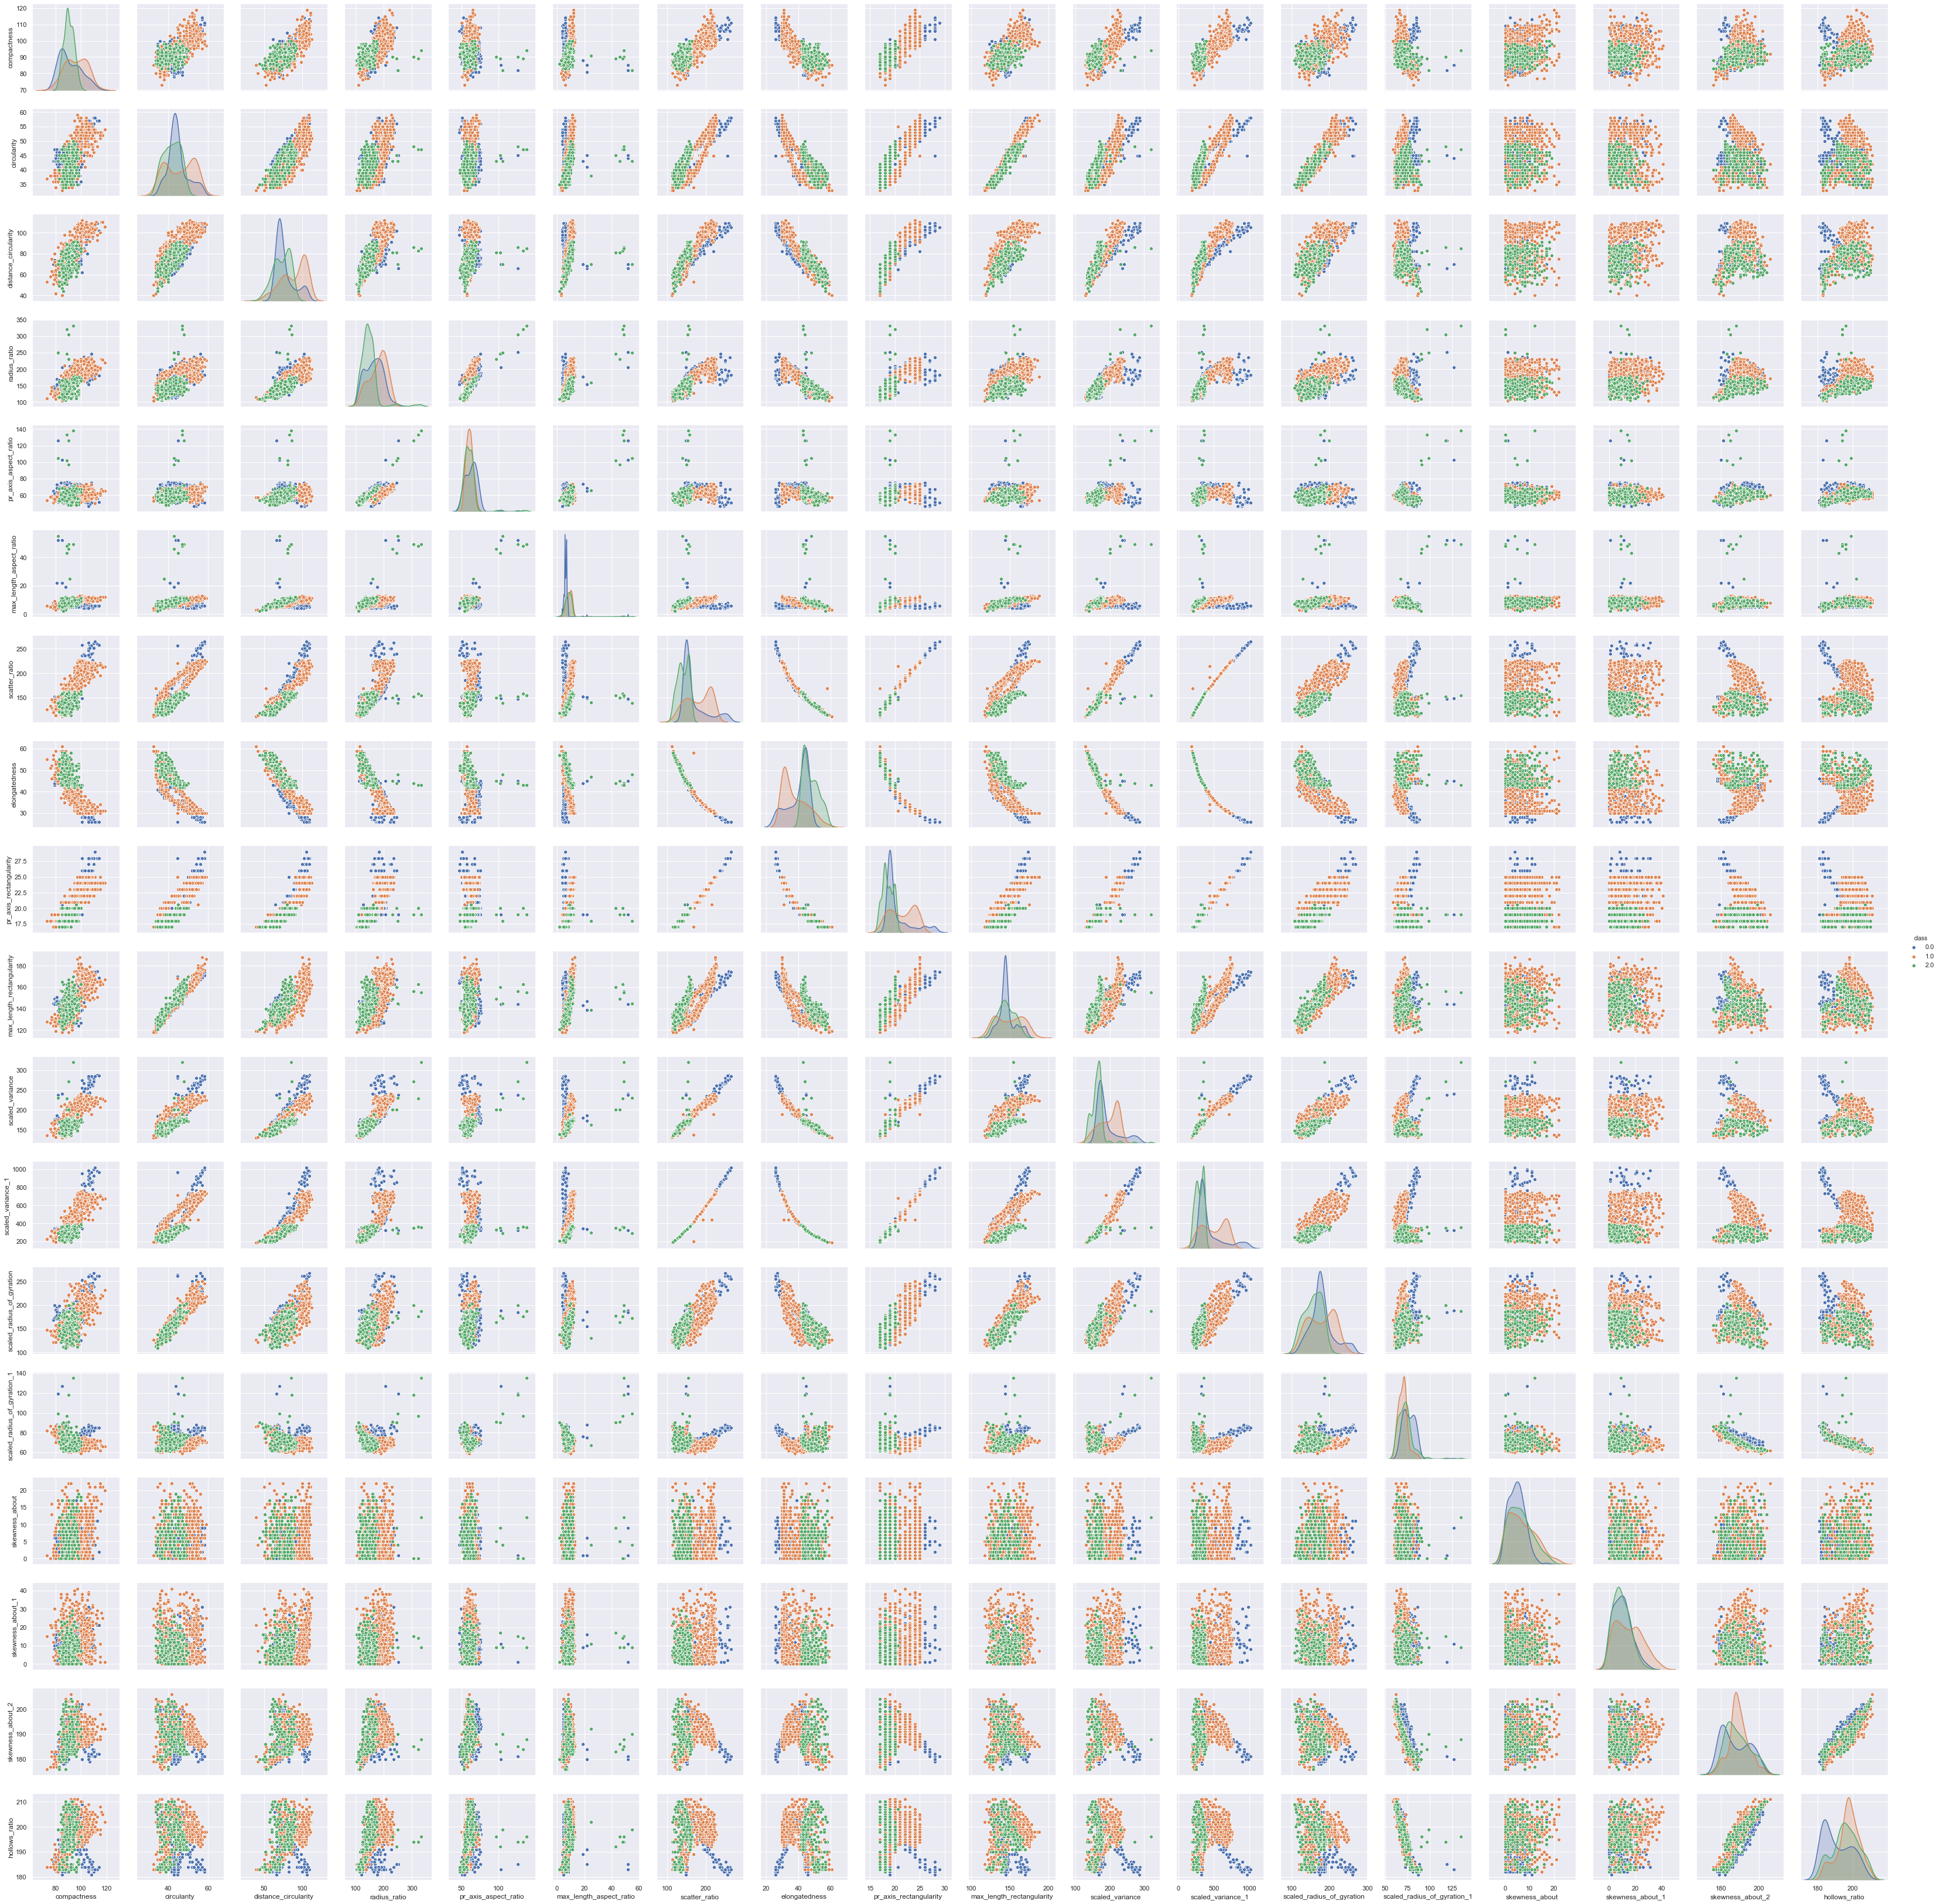

In [44]:
sns.pairplot(df, hue="class");

<font color = blue>
    
- In some of the columns, the data points are captured very close to each other in a cluttered manner and in some other columns a marginal space can be observed between data points. The presence of data points with some gap can influence the result of predicting different levels for target column. 
- The presence of few data points can be seen in some columns like 'Max length aspect ratio', 'scaled radius of gyration 1' etc..
- Among all the 3 types’ vehicles, the bus class seems to be distributed normally or nearby to the normal with respect to all the independent variables.
- Some of the columns seem to be highly correlated, a linear correlation is observed between many of the columns.
- Distribution in Some of the columns are like scatter cloud with presence of outliers. 
- A perfect collinearity is observed between many of the columns. Further, degree of correlation can be observed from correlation matrix or can be visualized from heat map made below for correlation. 
- The distribution of different levels of target column is uneven in nature. Since the data points are more for the vehicle type car, the distribution of all the levels also dominated by car as well and the prediction accuracy of the model will also be biased towards the vehicle type car.
- Based upon the number of levels present in dataset, three number of clusters can be formed. 
- Apart from the cluster made out of types of vehicles, based upon the modality of the distribution curve, we can also make two to four number of clusters.


In [45]:
df.corr().T

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr_axis_aspect_ratio            0.091704     0.153362              0.158397   
max_length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr_axis_rectangularity          0.813636     0.844972              0.893128   
max_length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance_1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration_1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about_1                0.157387    -0.011851              0.265553   
skewness_about_2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
class                          -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr_axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr_axis_aspect_ratio             0.663559              1.000000   
max_length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr_axis_rectangularity           0.708285              0.079395   
max_length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance_1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration_1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about_1                 0.173832             -0.032134   
skewness_about_2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   
class                           -0.182270             -0.098318   

                             max_length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr_axis_aspect_ratio                        0.648704       0.103715   
max_length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr_axis_rectangularity                      0.161592       0.989370   
max_length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance_1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration_1                 0.295574      -0.027985   
skewness_about                            

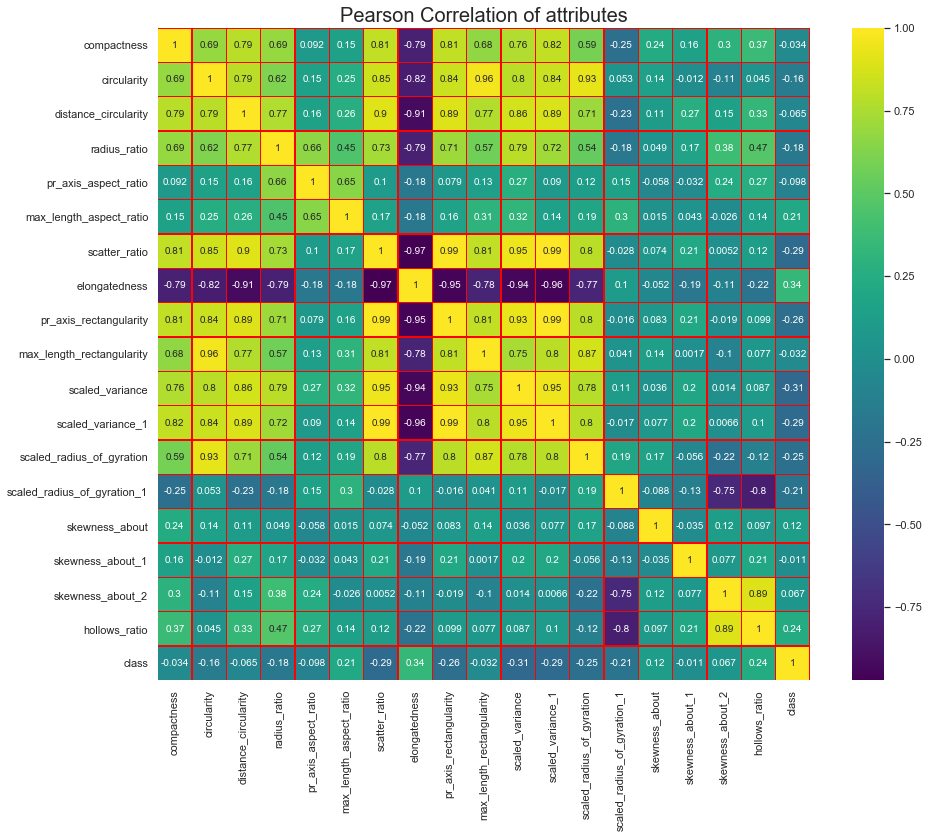

In [46]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (15,12))
plt.title('Pearson Correlation of attributes', y=1, size = 20)
sns.heatmap(df.corr(), linewidth = 0.2, vmax = 1.0,
           square = True,  cmap = colormap,linecolor = 'red', annot = True); 

<font color = blue>
    
- None of the independent columns are highly correlated with the dependent column.
- Half of the columns present in the data set are highly correlated with each other. Some are correlated in a positive manner and some are correlated in a negative manner. 
- But nowhere a perfect collinearity is observed among the columns. Thus none of the columns are duplicate in nature.
- A high collinearity among the independent columns signifies dependencies on each other. Means a simple change in value of any column directly or indirectly affect the corresponding correlated column. 
- In order to avoid the dominant effect of these independent columns on model performance and to make it unbiased we can use level of significance and put a threshold limit on correlation value to drop or delete the columns having multicollinearity.


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   3.d. Bivariate analysis (some intrinsic columns)
<a id='BV'></a>

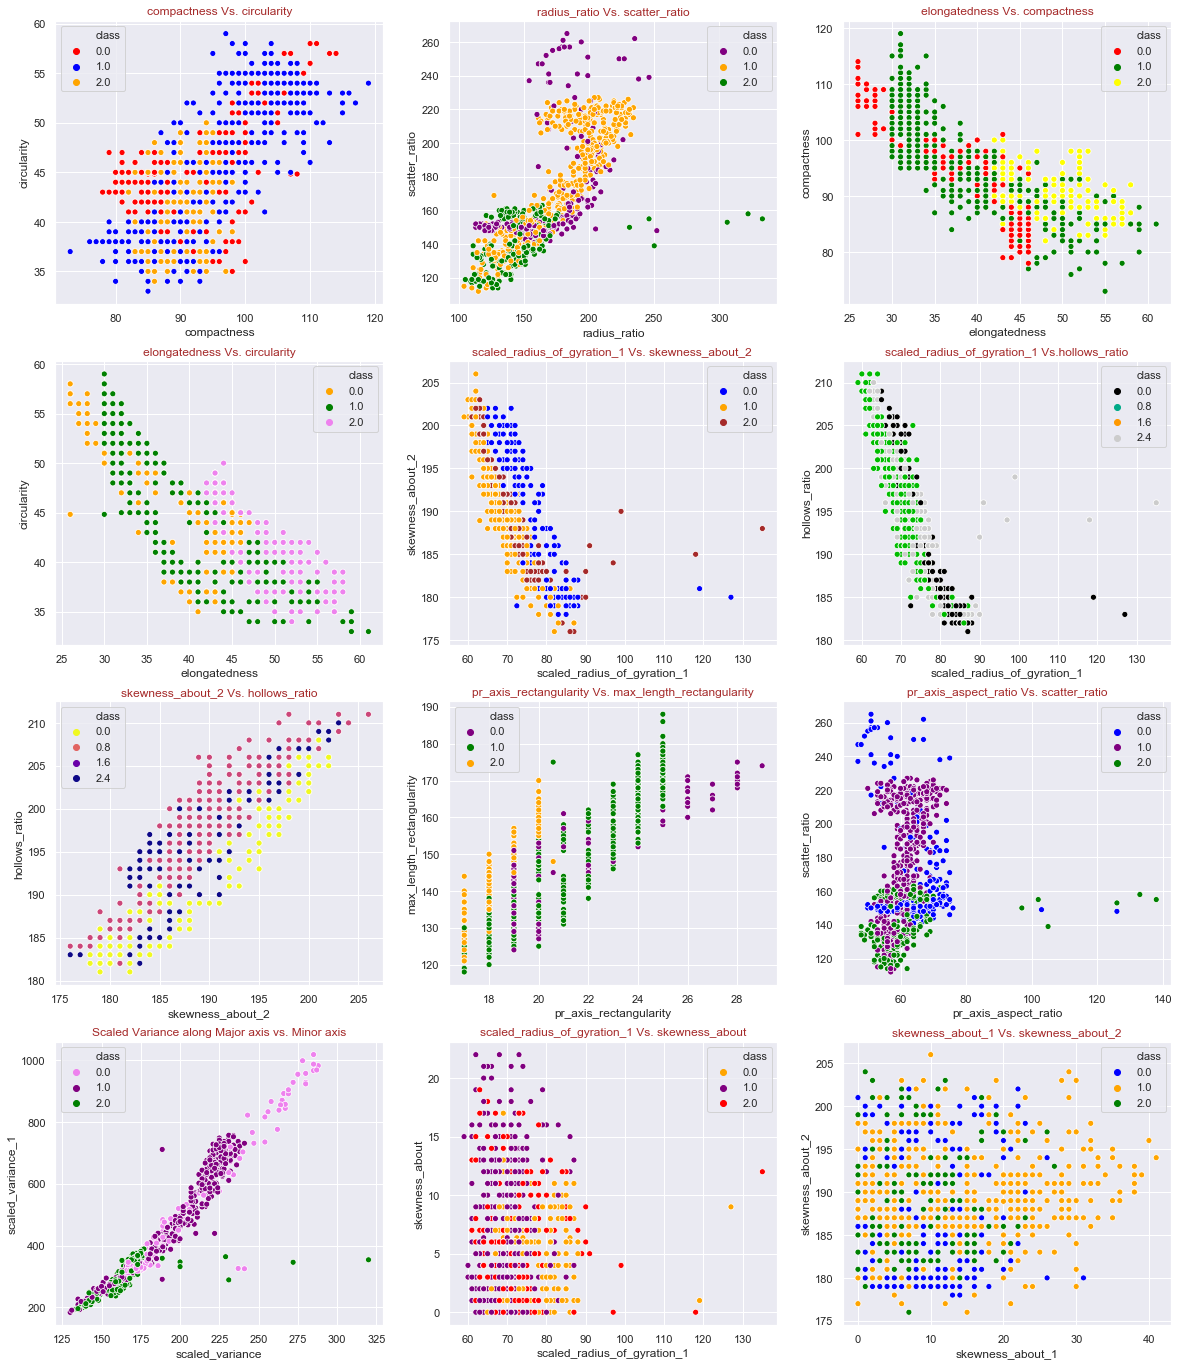

In [47]:
plt.figure(figsize = (20,24))

plt.subplot(4,3,1)
sns.scatterplot(df.compactness, df.circularity, hue = df['class'], palette = ['red', 'blue', 'orange'])
plt.title('compactness Vs. circularity', color = 'brown');

plt.subplot(4,3,2)
sns.scatterplot(df.radius_ratio, df.scatter_ratio, hue = df['class'], palette = ['purple', 'orange', 'green'])
plt.title('radius_ratio Vs. scatter_ratio', color = 'brown');

plt.subplot(4,3,3)
sns.scatterplot(df.elongatedness, df.compactness, hue = df['class'], palette = ['red', 'green', 'yellow']);
plt.title('elongatedness Vs. compactness', color = 'brown');

plt.subplot(4,3,4)
sns.scatterplot(df.elongatedness, df.circularity, hue = df['class'], palette = ['orange', 'green', 'violet']);
plt.title('elongatedness Vs. circularity', color = 'brown');

plt.subplot(4,3,5)
sns.scatterplot(df.scaled_radius_of_gyration_1, df.skewness_about_2, hue = df['class'], palette = ['blue', 'orange', 'brown']);
plt.title('scaled_radius_of_gyration_1 Vs. skewness_about_2 ', color = 'brown');

plt.subplot(4,3,6)
sns.scatterplot(df.scaled_radius_of_gyration_1, df.hollows_ratio, hue = df['class'], palette='nipy_spectral');
plt.title('scaled_radius_of_gyration_1 Vs.hollows_ratio', color = 'brown');

plt.subplot(4,3,7)
sns.scatterplot(df.skewness_about_2, df.hollows_ratio, hue = df['class'], palette='plasma_r');
plt.title('skewness_about_2 Vs. hollows_ratio', color = 'brown');

plt.subplot(4,3,8)
sns.scatterplot(df.pr_axis_rectangularity, df.max_length_rectangularity, hue = df['class'], palette = ['purple', 'green', 'orange']);
plt.title('pr_axis_rectangularity Vs. max_length_rectangularity', color = 'brown');

plt.subplot(4,3,9)
sns.scatterplot(df.pr_axis_aspect_ratio, df.scatter_ratio, hue = df['class'], palette = ['Blue', 'purple', 'green']);
plt.title('pr_axis_aspect_ratio Vs. scatter_ratio', color = 'brown');

plt.subplot(4,3,10)
sns.scatterplot(df.scaled_variance, df.scaled_variance_1, hue = df['class'], palette = ['violet', 'purple', 'green']);
plt.title('Scaled Variance along Major axis vs. Minor axis', color = 'brown');

plt.subplot(4,3,11)
sns.scatterplot(df.scaled_radius_of_gyration_1, df.skewness_about, hue = df['class'], palette = ['orange','purple', 'red']);
plt.title('scaled_radius_of_gyration_1 Vs. skewness_about', color = 'brown');

plt.subplot(4,3,12)
sns.scatterplot(df.skewness_about_1, df.skewness_about_2, hue = df['class'], palette = ['Blue', 'orange', 'green']);
plt.title('skewness_about_1 Vs. skewness_about_2', color = 'brown');

<font color = blue>
    
- The above scatter plots are drawn by taking some random independent columns in order to check the collinearity and cluster cloud.
- Except the scatter plot between 'Scaled variance 1' and 'scaled variance', none of the columns are having very high correlation value with each other.
- A scatter cloud can be observed in the very last plot, which signifies a very low correlation value almost near to zero. So this kind of correlation value can help to predict the accurate result without any bias error or variance error.
- In some of the scatter plots, presence of outliers can be observed, but the level seems to be different among all. Mostly, the vehicle type van seems to be outlier in all the above scatter plots.


<font Color = green>

#### Using Z-score method to standardize the data.

- The independent columns present in the dataset are numerical in nature. The range and scale are not uniform across the numerical columns. Thus to avoid any kind of biasness towards any of the numerical columns or to avoid the dominating effect of any column on the performance accuracy, we need to scale these before doing any operation. 
- So, here we will be imputing Z-score method to scale the independent columns present in the dataset.
- Prior to that, we need no separate out our target column and independent columns.

In [48]:
df_ind_var = df.drop('class', axis =1) # Separating the target column from independent column

In [49]:
from scipy.stats import zscore
df_ind_var_z = df_ind_var.apply(zscore) # imputing zscore to the numerical columns.

In [50]:
df_ind_var_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about_2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 4. Splitting of Dataset into training and testing & Scaling 
<a id='STT'></a>

In [51]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis =1)
y = df['class']

In [52]:
X_z = X.apply(zscore)
X_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about_2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X_z, y, test_size = 0.3, random_state = 533)
x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
499     1.011168     1.496044              1.010040     -0.056562   
412    -1.662107    -0.298317             -0.706251     -1.075098   
506     0.889655     1.006673              1.899969      0.961975   
71      0.403605     2.311663              1.645704      1.740856   
430     1.254193     1.332920              1.645704      1.111760   

     pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
499             -1.101740                 0.311542       1.449809   
412             -0.213128                -0.340845      -0.569750   
506             -0.340073                 0.529004       1.359381   
71               1.056317                 0.529004       1.660807   
430             -0.086184                 0.529004       1.449809   

     elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
499      -1.272423                1.321154                   1.792311   
412       0.520853               -0.611739                  -0.137782   
506      -1.144331                1.321154                   0.965128   
71       -1.400514                1.707733                   2.619494   
430      -1.272423                1.321154                   1.378720   

     scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
499         1.256322           1.431818                   1.484622   
412        -0.594546          -0.620879                   0.039668   
506         1.096764           1.290057                   0.593055   
71          1.160587           1.658635                   1.330904   
430         1.192499           1.443159                   1.054210   

     scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
499                    -0.059987       -1.298768          2.061241   
412                     1.145795       -0.074340          0.268627   
506                    -0.997817       -1.298768          2.621433   
71                     -0.327938        0.741945          1.389011   
430                    -0.729866       -1.298768         -0.403603   

     skewness_about_2  hollows_ratio  
499         -0.312193       0.318467  
412         -1.450677      -1.564671  
506          0.175729       1.394546  
71          -0.474833       0.318467  
430         -0.149552       0.721997

In [54]:
y_train.head()

499    1.0
412    0.0
506    1.0
71     1.0
430    1.0
Name: class, dtype: float64

In [55]:
# checking the split of data
print('{0:0.2f}% data is in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% data is in testing set'.format((len(x_test)/len(df.index))*100))

69.98% data is in training set
30.02% data is in testing set


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 5. Support Vector Machine Classifier Algorithm after Scaling the Dataset
<a id='O1SE'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   5.a. Train and test using Support Vector Machine Classifier Algorithm
<a id='O1SVM'></a>

<font color = violet>
    
### SVM Classifier Model Building and prediction

In [56]:
# Building a Support Vector Machine on trian data
svc_model_rbf = SVC( kernel = 'rbf')
svc_fit_rbf = svc_model_rbf.fit(x_train, y_train)

y_train_pred_svc_rbf = svc_fit_rbf.predict(x_train)

print('Training model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_train, y_train_pred_svc_rbf)*100))

y_test_pred_svc_rbf = svc_fit_rbf.predict(x_test)
print('Testing Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_test, y_test_pred_svc_rbf)*100))

Training model Accuracy value: 97.97%
Testing Model Accuracy value: 96.85%


<font color = violet>
    
### SVM Classifier Confusion Matrix

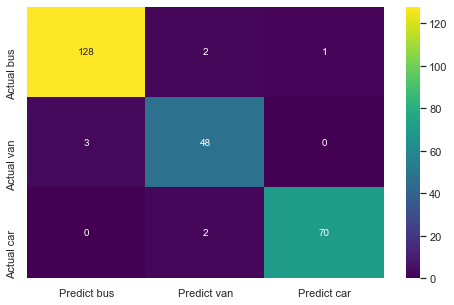

In [57]:
cmSVC_rbf = metrics.confusion_matrix(y_test, y_test_pred_svc_rbf, labels = [1.0,2.0, 0.0])
df_cmSVC_rbf = pd.DataFrame(cmSVC_rbf, index = [i for i in ['Actual bus', 'Actual van', 'Actual car']],
                       columns = [i for i in ['Predict bus', 'Predict van', 'Predict car']])
colormap = plt.cm.viridis
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC_rbf, annot = True, fmt = 'g', cmap = colormap, linecolor = 'red');

<Font color = brown>

The confusion matrix Explanation:
- Total number of vehicles correctly predicted by the model are 128, 48 and 70 for bus, van and car respectively. 
- Total number of vehicles incorrectly predicted by the model are 8 out of 846. This is the combination of both Type I error and Type II error.

<font color = violet>
    
### SVM Classifier Model Report

In [58]:
print(metrics.classification_report (y_test, y_test_pred_svc_rbf, labels = [1.0,2.0,0.0]))

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       131
         2.0       0.92      0.94      0.93        51
         0.0       0.99      0.97      0.98        72

    accuracy                           0.97       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.97      0.97      0.97       254



In [59]:
import numpy as np
y_grid = (np.column_stack([y_test, y_test_pred_svc_rbf])) # Checking the prediction value and actual value.

In [60]:
print(y_grid)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 2.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [2. 2.]
 [0. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 

In [61]:
np.savetxt('ocr.txt', y_grid, fmt = '%s') # Saving the prediction value and actual value in a text file format. 

In [62]:
resultsdf = pd.DataFrame({'Techniques Used': ['SVM with scaling'], 'Accuracy (%)': [accuracy_score(y_test, y_test_pred_svc_rbf).mean()*100], 'Std. Dev (%)': [accuracy_score(y_test, y_test_pred_svc_rbf).std()*100.0] })
resultsdf = resultsdf[['Techniques Used', 'Accuracy (%)', 'Std. Dev (%)']]
resultsdf


Techniques Used  Accuracy (%)  Std. Dev (%)
0  SVM with scaling     96.850394           0.0

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   5.b. Observations on Accuracies
<a id='O1O'></a>

<font color = Blue>
    
- In this Support vector classifier we could able to achieve an accuracy score of 96.85% after scaling the data with the help of z-score. 
- Further, we can also try to improve the performance of the algorithm after imputing various feature engineering methods.


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 6. Support Vector Machine Classifier Algorithm after KFold CV Imputation
<a id='O2SE'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   6.a. KFold CV - Model building and Testing without scaling the dataset
<a id='O2KSVM'></a>

<font color = violet>
    
### SVM Classifier Model Building and prediction

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 25
seed = 235

kfold = KFold(n_splits = num_folds, random_state = seed)
svc_k_model = SVC ( kernel = 'rbf')
results = cross_val_score(svc_k_model, X, y, cv = kfold)
print(results)
print('\n')
print('Accuracy before applying z_score:%.3f%% (%.3f%%)'%(results.mean()*100.0, results.std()*100.0))


[0.61764706 0.70588235 0.64705882 0.55882353 0.79411765 0.61764706
 0.70588235 0.76470588 0.55882353 0.79411765 0.55882353 0.61764706
 0.70588235 0.85294118 0.79411765 0.82352941 0.70588235 0.67647059
 0.5        0.70588235 0.70588235 0.63636364 0.81818182 0.6969697
 0.66666667]


Accuracy before applying z_score:68.920% (9.151%)


In [64]:
tempresultsdf = pd.DataFrame({'Techniques Used': ['SVM Kfold w/o scaling'], 'Accuracy (%)': [results.mean()*100], 'Std. Dev (%)': [results.std()*100.0] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Techniques Used', 'Accuracy (%)', 'Std. Dev (%)']]
resultsdf

Techniques Used  Accuracy (%)  Std. Dev (%)
0       SVM with scaling     96.850394      0.000000
0  SVM Kfold w/o scaling     68.919786      9.150603

<font color = blue>

- In this iteration we have imputed one of the non-exhaustive feature engineering process such as KFold Cross validation.
- After imputing the KFold CV we got an accuracy value of 68.919% with an standard deviation of 9.15%. It means our accuracy can range from 58% to 78%. Which is basically a range estimate for the performance measurement of the model.
- Here we have taken 25 number of folds, however, many other value for k can also be taken and tested..
- Further Improvement can also be made on the performance after scaling the data.


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   6.b. KFold CV - Model building and Testing after scaling the dataset
<a id='O2KSVM2'></a>

In [65]:
num_folds = 25
seed = 235

kfold = KFold(n_splits = num_folds, random_state = seed)
svc_k_model = SVC ( kernel = 'rbf')
results = cross_val_score(svc_k_model, X_z, y, cv = kfold)
print(results)
print('\n')
print('Accuracy after applying z_score:%.3f%% (%.3f%%)'%(results.mean()*100.0, results.std()*100.0))

[0.88235294 0.97058824 0.97058824 0.94117647 0.97058824 0.97058824
 0.94117647 1.         0.97058824 1.         0.97058824 0.97058824
 0.97058824 0.97058824 0.97058824 1.         0.97058824 0.97058824
 0.94117647 1.         0.94117647 0.96969697 0.96969697 0.93939394
 0.96969697]


Accuracy after applying z_score:96.570% (2.456%)


In [66]:
tempresultsdf = pd.DataFrame({'Techniques Used': ['SVM Kfold with scaling'], 'Accuracy (%)': [results.mean()*100], 'Std. Dev (%)': [results.std()*100.0] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Techniques Used', 'Accuracy (%)', 'Std. Dev (%)']]
resultsdf

Techniques Used  Accuracy (%)  Std. Dev (%)
0        SVM with scaling     96.850394      0.000000
0   SVM Kfold w/o scaling     68.919786      9.150603
0  SVM Kfold with scaling     96.570410      2.456419

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   6.c. Observations on Accuracies
<a id='O2O'></a>

<font color = blue>

- In this iteration we have imputed one of the non-exhaustive feature engineering process such as KFold Cross validation.
- After imputing the KFold CV we got an accuracy value of 95.57% with an standard deviation of 2.45%. It means our accuracy can range from 94.14% to 98.99%. Which is basically a range estimate for the performance measurement of the model.
- Here we have taken 25 number of folds, however, many other value for k can also be taken and tested..



## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 7. Support Vector Machine Classifier Algorithm after Feature Elimination based upon p-value and correlation
<a id='O3SE'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.a. Feature Elimination
<a id='O3FE'></a>

- Let's, consider only those columns, which are having correlation value more than 0.9

In [67]:
corr = df.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr_axis_aspect_ratio            0.091704     0.153362              0.158397   
max_length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr_axis_rectangularity          0.813636     0.844972              0.893128   
max_length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance_1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration_1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about_1                0.157387    -0.011851              0.265553   
skewness_about_2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
class                          -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr_axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr_axis_aspect_ratio             0.663559              1.000000   
max_length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr_axis_rectangularity           0.708285              0.079395   
max_length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance_1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration_1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about_1                 0.173832             -0.032134   
skewness_about_2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   
class                           -0.182270             -0.098318   

                             max_length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr_axis_aspect_ratio                        0.648704       0.103715   
max_length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr_axis_rectangularity                      0.161592       0.989370   
max_length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance_1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration_1                 0.295574      -0.027985   
skewness_about                            

In [68]:
columns =np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range (i+1, corr.shape[0]):
        if corr.iloc[i,j]>=0.90:
            if columns[j] :
                columns[j] = False

In [69]:
selected_columns = df.columns[columns]
selected_columns.shape

(13,)

In [70]:
selected_columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'elongatedness',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')

<font color = blue>

- Above columns are taken into consideritation after imputation of feature elimination based upon the correlation value more than 0.9
- Only 13 number of columns are selected based upon the feature elimination condition

In [71]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')

- Above columns are original columns of the dataset

In [72]:
df1 = df[selected_columns] 
# Assigning the selected columns after imputation of feature elimination

In [73]:
df_corr = df1.corr()
df_corr
# Checking for the correlation among thoese columns

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr_axis_aspect_ratio            0.091704     0.153362              0.158397   
max_length_aspect_ratio         0.148249     0.251208              0.264550   
elongatedness                  -0.788643    -0.821901             -0.911435   
scaled_radius_of_gyration_1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about_1                0.157387    -0.011851              0.265553   
skewness_about_2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
class                          -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr_axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr_axis_aspect_ratio             0.663559              1.000000   
max_length_aspect_ratio          0.450036              0.648704   
elongatedness                   -0.789795             -0.183264   
scaled_radius_of_gyration_1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about_1                 0.173832             -0.032134   
skewness_about_2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   
class                           -0.182270             -0.098318   

                             max_length_aspect_ratio  elongatedness  \
compactness                                 0.148249      -0.788643   
circularity                                 0.251208      -0.821901   
distance_circularity                        0.264550      -0.911435   
radius_ratio                                0.450036      -0.789795   
pr_axis_aspect_ratio                        0.648704      -0.183264   
max_length_aspect_ratio                     1.000000      -0.180041   
elongatedness                              -0.180041       1.000000   
scaled_radius_of_gyration_1                 0.295574       0.103481   
skewness_about                              0.015439      -0.051997   
skewness_about_1                            0.043489      -0.185691   
skewness_about_2                           -0.026180      -0.114727   
hollows_ratio                               0.143919      -0.216719   
class                                       0.207619       0.339348   

                             scaled_radius_of_gyration_1  skewness_about  \
compactness                                    -0.250071        0.235687   
circularity                                     0.052642        0.144394   
distance_circularity                           -0.225852        0.113813   
radius_ratio                                   -0.180819        0.048720   
pr_axis_aspect_ratio                            0.152776       -0.058481   
max_length_aspect_ratio                         0.295574        0.015439   
elongatedness                                   0.103481       -0.051997   
scaled_radius_of_gyration_1                     1.000000       -0.088304   
skewness_about                                 -0.088304        1.000000   
skewness_about_1                               -0.126417       -0.035023   
skewness_about_2                               -0.749509        0.115145   
hollows_ratio                                  -0.802608        0.096870   


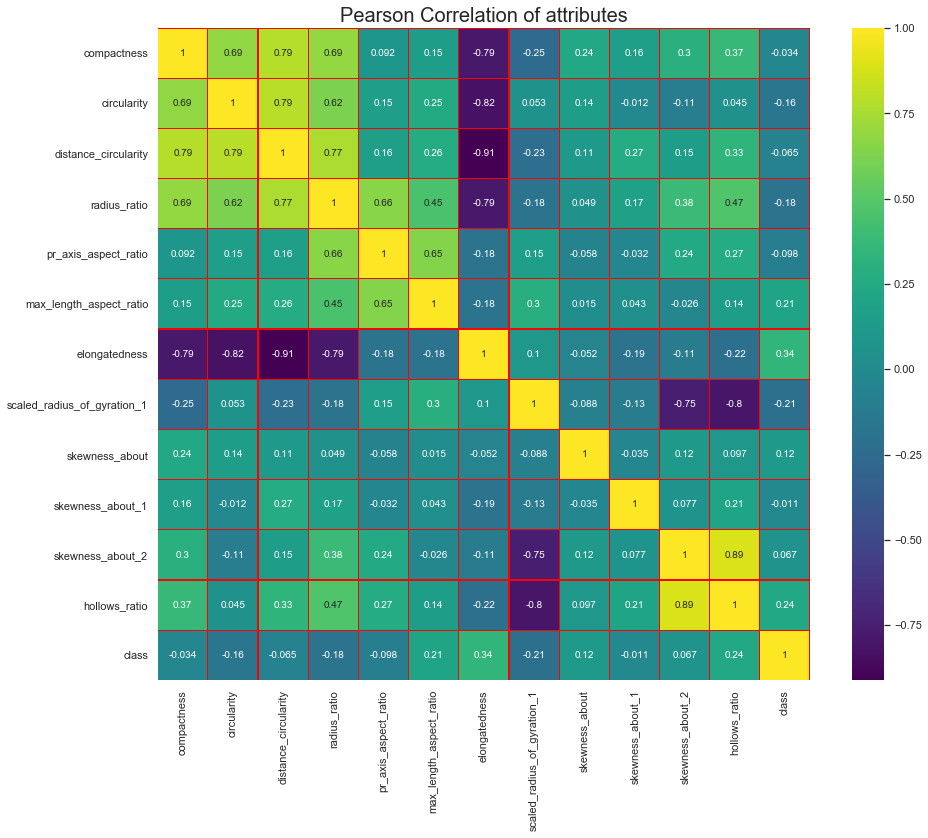

In [74]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (15,12))
plt.title('Pearson Correlation of attributes', y=1, size = 20)
sns.heatmap(df1.corr(), linewidth = 0.2, vmax = 1.0,
           square = True,  cmap = colormap,linecolor = 'red', annot = True); 

<font color = blue>

- Still we can observe a collinearity between columns, but this time it is less than 0.9, however we have not deleted the columns which are having a correlation value more than -0.9.
- Further we don't want to delete the columns, since there is some possibilities of missing valuable information from the dataset.


- Now the dataset has only those columns with correlation less than 0.9

### Now selecting columns based on p-value

Here we will be selecting the columns based on how they affect the p-value. Here we are removing the column Class because it is the column we are trying to predict

In [75]:
selected_columns1 = selected_columns[:12].values
# removing the class column

In [76]:
selected_columns1

array(['compactness', 'circularity', 'distance_circularity',
       'radius_ratio', 'pr_axis_aspect_ratio', 'max_length_aspect_ratio',
       'elongatedness', 'scaled_radius_of_gyration_1', 'skewness_about',
       'skewness_about_1', 'skewness_about_2', 'hollows_ratio'],
      dtype=object)

<font color = blue>

- Here we will be imputing the OLS (Ordinary Least Square) method to do the feature elimination based upon the Significant Confidence level of 0.05.
- Here our Assumption for Null Hypothesis will be 'The selected combination of dependent variable do not have any effect on the independent variable'.
- Here we will be building a small regression model and calculate the p values.
- If the p values are higher than the threshold limit (Here we have taken 0.05), we discard that combination of features.


In [77]:
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numvars = len(x[0])
    for i in range(0, numvars):
        regressor_OLS = sm.OLS(y,x).fit()
        maxvar = max(regressor_OLS.pvalues).astype(float)
        if maxvar > sl:
            for j in range (0, numvars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxvar):
                    x = np.delete(x,j,1)
                    columns = np.delete(columns,j)
    regressor_OLS.summary()
    return x, columns

In [78]:
SL = 0.05 # Threshold limit is 0.05 
data_modeled, selected_columns2 = backwardElimination(df1.iloc[:,:12].values, df1.iloc[:,12].values, SL, selected_columns1) 

In [79]:
# Moving the result to a new dataframe
result = pd.DataFrame()
result['class'] = df.iloc[:,18]

In [80]:
result.head(10).T

0    1    2    3    4    5    6    7    8    9
class  2.0  2.0  1.0  2.0  0.0  0.0  0.0  2.0  2.0  1.0

In [81]:
# Creating a dataframe with the columns selected using the p-value and correlation

df2 = pd.DataFrame(data = data_modeled, columns = selected_columns2)
df2.head()

compactness  distance_circularity  radius_ratio  pr_axis_aspect_ratio  \
0         95.0                  83.0         178.0                  72.0   
1         91.0                  84.0         141.0                  57.0   
2        104.0                 106.0         209.0                  66.0   
3         93.0                  82.0         159.0                  63.0   
4         85.0                  70.0         205.0                 103.0   

   max_length_aspect_ratio  elongatedness  scaled_radius_of_gyration_1  \
0                     10.0           42.0                         70.0   
1                      9.0           45.0                         72.0   
2                     10.0           32.0                         73.0   
3                      9.0           46.0                         63.0   
4                     52.0           45.0                        127.0   

   skewness_about_1  skewness_about_2  hollows_ratio  
0              16.0             187.0          197.0  
1              14.0             189.0          199.0  
2               9.0             188.0          196.0  
3              10.0             199.0          207.0  
4              11.0             180.0          183.0

### Visualizing the selected features
Plotting the data to visualize their distribution

In [82]:
# Creating a dataframe with the columns selected using correlation alone
data_modeled1 = df1.iloc[:, :12].values
df3 = pd.DataFrame(data = data_modeled1, columns = selected_columns1)
df3.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  elongatedness  \
0                  72.0                     10.0           42.0   
1                  57.0                      9.0           45.0   
2                  66.0                     10.0           32.0   
3                  63.0                      9.0           46.0   
4                 103.0                     52.0           45.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about_2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

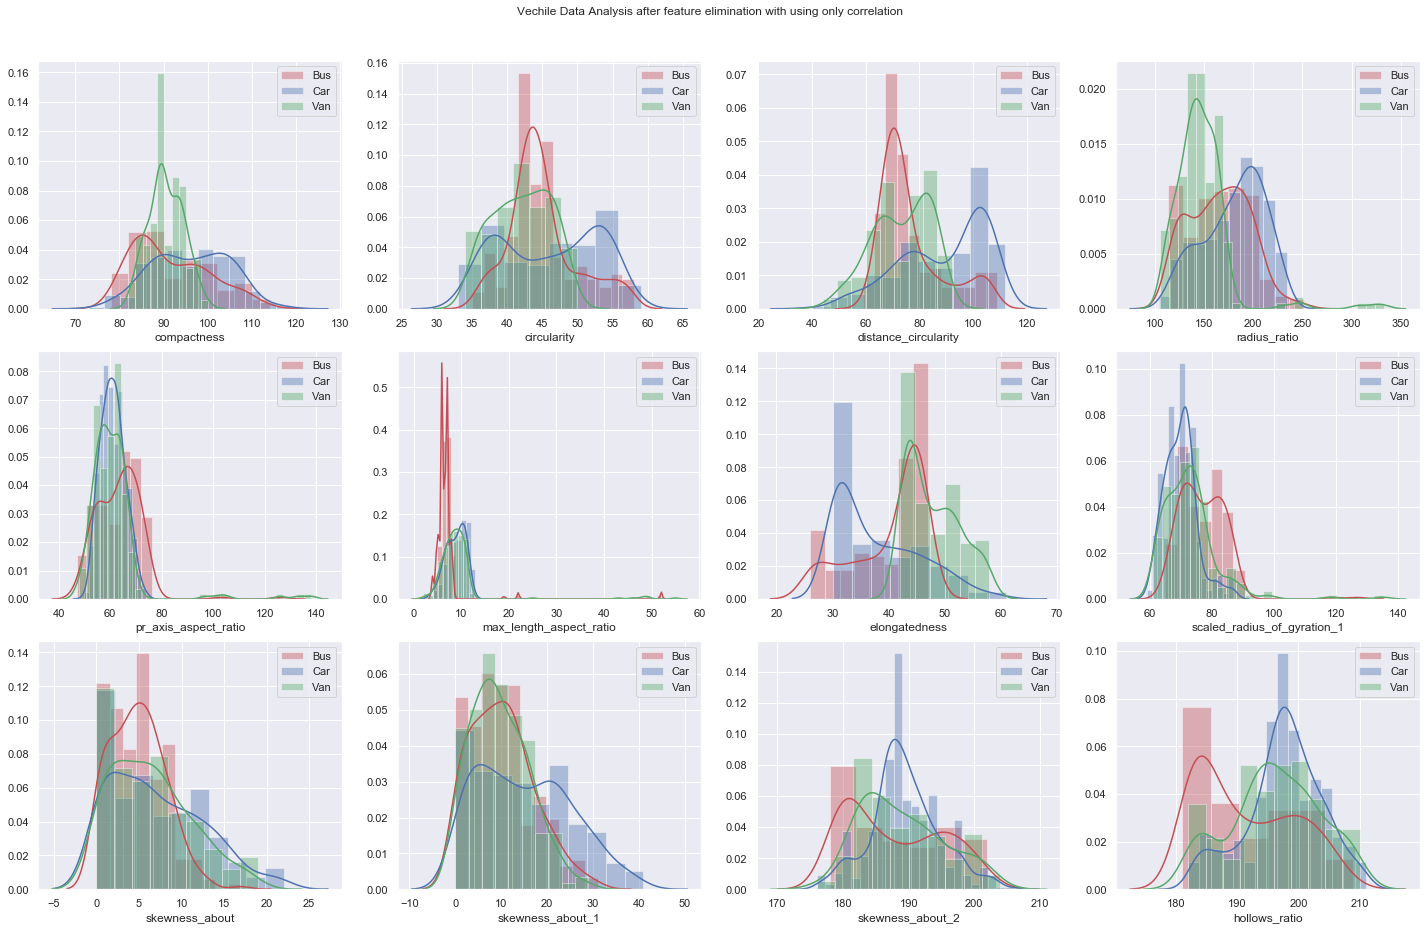

In [83]:
fig = plt.figure(figsize = (20,25))
j = 0
for i in df3.columns:
    plt.subplot(6,4, j+1)
    j+= 1
    sns.distplot(df3[i][result['class']==0], color = 'r', label = 'Bus')
    sns.distplot(df3[i][result['class']==1], color = 'b', label = 'Car')
    sns.distplot(df3[i][result['class']==2], color = 'g', label = 'Van')
    plt.legend(loc = 'best')
fig.suptitle('Vechile Data Analysis after feature elimination with using only correlation')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

<font color = blue>

- The above group of graphs contain the features after completing feature elimination with the help of correlation among them. 
- Here, we have taken a threshold value for correlation as 0.9, and eliminated the one of those columns which has a correlation value of 0.9.
- Here, we have also missed lot of information while deleting those columns.


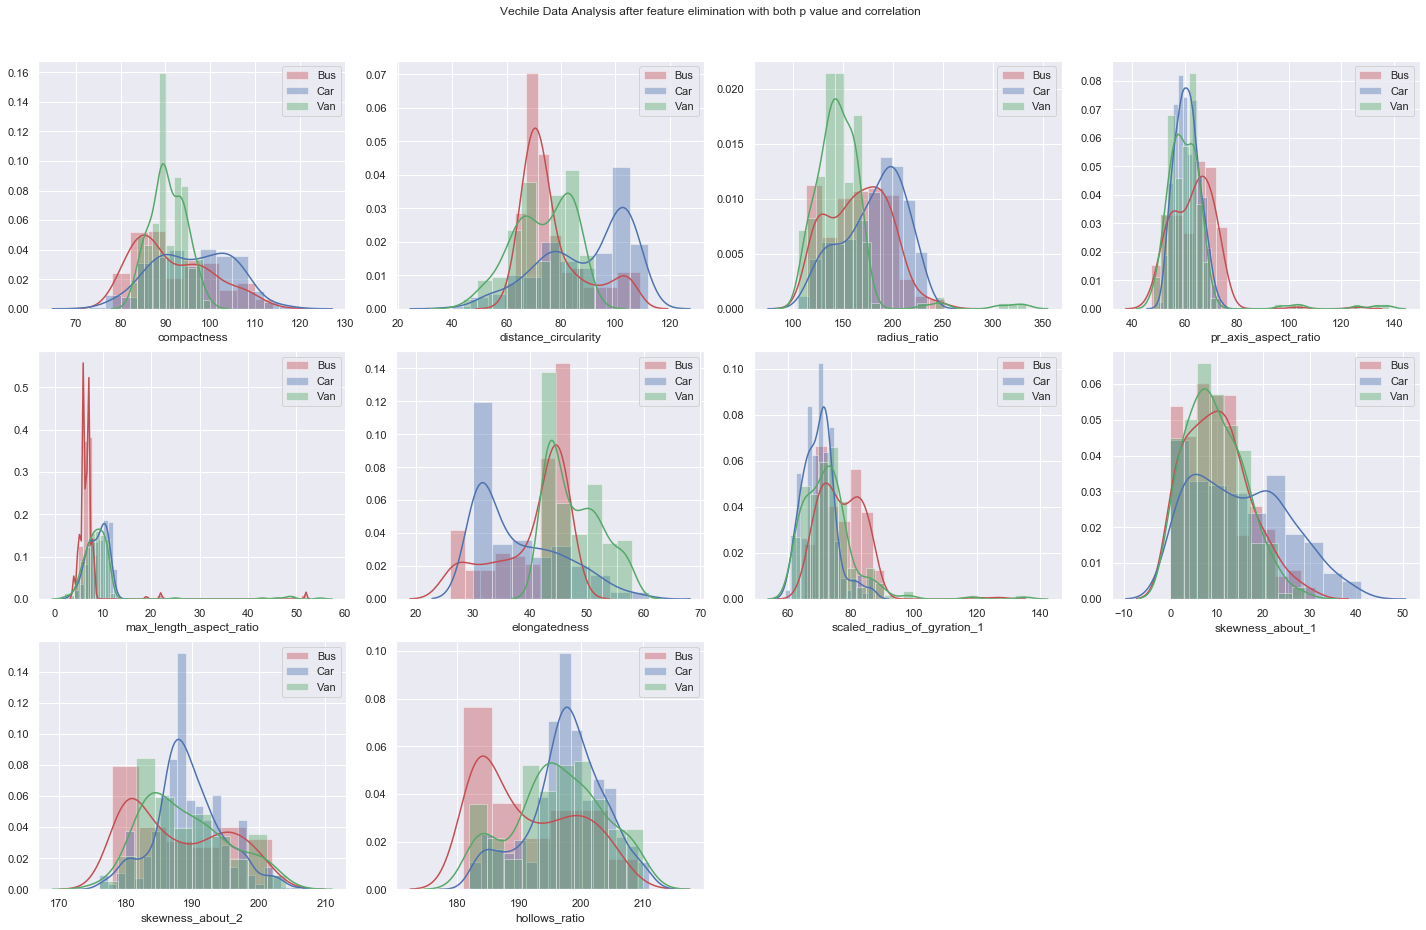

In [84]:
fig = plt.figure(figsize = (20,25))
j = 0
for i in df2.columns:
    plt.subplot(6,4, j+1)
    j+= 1
    sns.distplot(df2[i][result['class']==0], color = 'r', label = 'Bus')
    sns.distplot(df2[i][result['class']==1], color = 'b', label = 'Car')
    sns.distplot(df2[i][result['class']==2], color = 'g', label = 'Van')
    plt.legend(loc = 'best')
fig.suptitle('Vechile Data Analysis after feature elimination with both p value and correlation')

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

<font color = blue>


- The above group of graphs contain the features after completing feature elimination with the help of correlation value among them and p-value of the individual. 
- Here, we have taken a threshold value for correlation as 0.9, and eliminated the one of those columns which has a correlation value of 0.9, and a p-value of 0.05.

- Here, we have also missed lot of information while deleting those columns.
    


- Now we will split the data into train and test set. 30% of the data is used to create the test data and 70% to create train data.

In [85]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.values, result.values, test_size = 0.3, random_state = 256)

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.b. Model building and Testing after feature elimination without scaling the dataset
<a id='O3FESVM1'></a>

#### Building a model with the selected features
We are using a Support Vector Classifier with a RBF kernel to make the predictions. we will train the model on our training data and calculate the accuracy on test data.

<font color = violet>
    
### SVM Classifier Model Building and prediction

In [86]:
# Building a Support Vector Machine on trian data
svc_model_rbf2 = SVC( kernel = 'rbf')
svc_fit_rbf2 = svc_model_rbf2.fit(x_train2, y_train2)

y_train_pred_svc_rbf2 = svc_fit_rbf2.predict(x_train2)

print('Training model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_train2, y_train_pred_svc_rbf2)*100))

y_test_pred_svc_rbf2 = svc_fit_rbf2.predict(x_test2)
print('Testing Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_test2, y_test_pred_svc_rbf2)*100))

Training model Accuracy value: 61.32%
Testing Model Accuracy value: 56.30%


<font color = violet>
    
### SVM Classifier Confusion Matrix

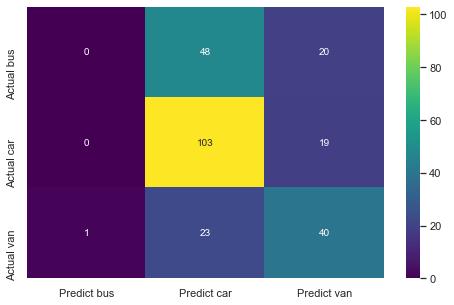

In [87]:
from sklearn.metrics import confusion_matrix

cmSVC_rbf2 = metrics.confusion_matrix(y_test2, y_test_pred_svc_rbf2, labels = [0,1,2])
df_cmSVC_rbf2 = pd.DataFrame(cmSVC_rbf2, index = [i for i in ['Actual bus', 'Actual car', 'Actual van']],
                       columns = [i for i in ['Predict bus', 'Predict car', 'Predict van']])
colormap = plt.cm.viridis
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC_rbf2, annot = True, fmt = 'g', cmap = colormap, linecolor = 'red');

<font color = brown>

The confusion matrix Explanation:
- Total number of vehicles correctly predicted by the model are 0, 40 and 103 for bus, van and car respectively. 
- Total number of vehicles incorrectly predicted by the model are 111 out of 846. This is the combination of both Type I error and Type II error.


<font color = violet>
    
### SVM Classifier Model Report

In [88]:
print(metrics.classification_report (y_test2, y_test_pred_svc_rbf2, labels = [0,1,2]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.59      0.84      0.70       122
           2       0.51      0.62      0.56        64

    accuracy                           0.56       254
   macro avg       0.37      0.49      0.42       254
weighted avg       0.41      0.56      0.48       254



In [89]:
tempresultsdf = pd.DataFrame({'Techniques Used': ['SVM after feature elimination w/o scaling'], 'Accuracy (%)': [accuracy_score(y_test2, y_test_pred_svc_rbf2).mean()*100], 'Std. Dev (%)': [accuracy_score(y_test2, y_test_pred_svc_rbf2).std()*100.0] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Techniques Used', 'Accuracy (%)', 'Std. Dev (%)']]
resultsdf

Techniques Used  Accuracy (%)  Std. Dev (%)
0                           SVM with scaling     96.850394      0.000000
0                      SVM Kfold w/o scaling     68.919786      9.150603
0                     SVM Kfold with scaling     96.570410      2.456419
0  SVM after feature elimination w/o scaling     56.299213      0.000000

<font color = blue>

- Here we got very less accuracy because of the less number of columns we have after feature elimination.
- Here we have also not imputed the z-score to scale the data, it means the result is highly biased and dominated by the columns with high scale.
- To scale the dataset, we will be imputing the z-score and again check for accuracy score

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.c. Model building and Testing after feature elimination after scaling the dataset
<a id='O3FESVM2'></a>

In [90]:
df2_z = df2.apply(zscore)
df2_z.head(3)

compactness  distance_circularity  radius_ratio  pr_axis_aspect_ratio  \
0     0.160580              0.056545      0.272965              1.310206   
1    -0.325470              0.120112     -0.835442             -0.593962   
2     1.254193              1.518571      1.201630              0.548539   

   max_length_aspect_ratio  elongatedness  scaled_radius_of_gyration_1  \
0                 0.311542       0.136580                    -0.327938   
1                 0.094079       0.520853                    -0.059987   
2                 0.311542      -1.144331                     0.073989   

   skewness_about_1  skewness_about_2  hollows_ratio  
0          0.380665         -0.312193       0.183957  
1          0.156589          0.013088       0.452977  
2         -0.403603         -0.149552       0.049447

In [91]:
x_train2_z, x_test2_z, y_train2_z, y_test2_z = train_test_split(df2_z.values, result.values, test_size = 0.3, random_state = 256)

<font color = violet>
    
### SVM Classifier Model Building and prediction

In [92]:
# Building a Support Vector Machine on trian data
svc_model_rbf2_z = SVC( kernel = 'rbf')
svc_fit_rbf2_z = svc_model_rbf2_z.fit(x_train2_z, y_train2_z)

y_train_pred_svc_rbf2_z = svc_fit_rbf2_z.predict(x_train2_z)

print('Training model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_train2_z, y_train_pred_svc_rbf2_z)*100))

y_test_pred_svc_rbf2_z = svc_fit_rbf2_z.predict(x_test2_z)
print('Testing Model Accuracy value: {0:0.2f}%'.format(accuracy_score(y_test2_z, y_test_pred_svc_rbf2_z)*100))

Training model Accuracy value: 95.27%
Testing Model Accuracy value: 95.67%


<font color = violet>
    
### SVM Classifier Confusion Matrix

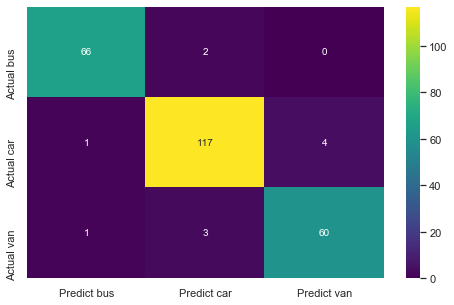

In [93]:
from sklearn.metrics import confusion_matrix

cmSVC_rbf2_z = metrics.confusion_matrix(y_test2_z, y_test_pred_svc_rbf2_z, labels = [0,1,2])
df_cmSVC_rbf2_z = pd.DataFrame(cmSVC_rbf2_z, index = [i for i in ['Actual bus', 'Actual car', 'Actual van']],
                       columns = [i for i in ['Predict bus', 'Predict car', 'Predict van']])
colormap = plt.cm.viridis
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC_rbf2_z, annot = True, fmt = 'g', cmap = colormap, linecolor = 'red');

<font color = brown>
The confusion matrix Explanation:
- Total number of vehicles correctly predicted by the model are 66, 60 and 117 for bus, van and car respectively. 
    
- Total number of vehicles incorrectly predicted by the model are 11 out of 846. This is the combination of both Type I error and Type II error.

- This is done after feature elimination.  


<font color = violet>
    
### SVM Classifier Model Report

In [94]:
print(metrics.classification_report (y_test2_z, y_test_pred_svc_rbf2_z, labels = [0,1,2]))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.96      0.96      0.96       122
           2       0.94      0.94      0.94        64

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



In [95]:
tempresultsdf = pd.DataFrame({'Techniques Used': ['SVM after feature elimination with scaling'], 'Accuracy (%)': [accuracy_score(y_test2_z, y_test_pred_svc_rbf2_z).mean()*100], 'Std. Dev (%)': [accuracy_score(y_test2_z, y_test_pred_svc_rbf2_z).std()*100.0] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Techniques Used', 'Accuracy (%)', 'Std. Dev (%)']]
resultsdf

Techniques Used  Accuracy (%)  Std. Dev (%)
0                            SVM with scaling     96.850394      0.000000
0                       SVM Kfold w/o scaling     68.919786      9.150603
0                      SVM Kfold with scaling     96.570410      2.456419
0   SVM after feature elimination w/o scaling     56.299213      0.000000
0  SVM after feature elimination with scaling     95.669291      0.000000

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   7.d. Observations on Accuracies
<a id='O3O'></a>

<font color = Blue>
    
- The above SVC model has predicted the accuracy with only 10 number of columns out of 18 numbers. 
- It gave an accuracy of 56.299% without scaling and 95.66% with scaling.
- So, this SVC model after feature elimination process seems to be much more reliable than the previous SVC model which has used all the independent columns to predict the accuracy.


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 8. Support Vector Machine Classifier Algorithm after PCA Imputation & KFold CV
<a id='O4SE'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   8.a. Principal components, their analysis, Eigen Vectors, Eigen Values, % of variation explaind by components
<a id='O4PCA'></a>

In [96]:
x_train_z, x_test_z, y_train, y_test = train_test_split(X_z, y, test_size = 0.3, random_state = 533)
x_train_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
499     1.011168     1.496044              1.010040     -0.056562   
412    -1.662107    -0.298317             -0.706251     -1.075098   
506     0.889655     1.006673              1.899969      0.961975   
71      0.403605     2.311663              1.645704      1.740856   
430     1.254193     1.332920              1.645704      1.111760   

     pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
499             -1.101740                 0.311542       1.449809   
412             -0.213128                -0.340845      -0.569750   
506             -0.340073                 0.529004       1.359381   
71               1.056317                 0.529004       1.660807   
430             -0.086184                 0.529004       1.449809   

     elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
499      -1.272423                1.321154                   1.792311   
412       0.520853               -0.611739                  -0.137782   
506      -1.144331                1.321154                   0.965128   
71       -1.400514                1.707733                   2.619494   
430      -1.272423                1.321154                   1.378720   

     scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
499         1.256322           1.431818                   1.484622   
412        -0.594546          -0.620879                   0.039668   
506         1.096764           1.290057                   0.593055   
71          1.160587           1.658635                   1.330904   
430         1.192499           1.443159                   1.054210   

     scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
499                    -0.059987       -1.298768          2.061241   
412                     1.145795       -0.074340          0.268627   
506                    -0.997817       -1.298768          2.621433   
71                     -0.327938        0.741945          1.389011   
430                    -0.729866       -1.298768         -0.403603   

     skewness_about_2  hollows_ratio  
499         -0.312193       0.318467  
412         -1.450677      -1.564671  
506          0.175729       1.394546  
71          -0.474833       0.318467  
430         -0.149552       0.721997

<font color = green>

#### Step 1:
- - Generating the covariance matrix and the eigen values for the PCA analysis


In [97]:
cov_matrix = np.cov(X_z.T) # the relevent covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381

<font color = green>

#### Step 2:
- -  Generating the Eigen Values and Eigen Vectors

In [98]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s'%e_vecs)
print('\nEigenValues \n%s'%e_vals)

Eigenvectors 
[[ 2.75259459e-01  1.27010856e-01  1.19874162e-01 -7.83109159e-02
  -6.93062475e-02  1.44650156e-01  4.53755811e-01  5.64713964e-01
   4.83554183e-01  2.61221731e-01 -4.64498989e-02  1.34446607e-02
  -1.59324486e-01  6.56773512e-03 -5.98448138e-02 -1.62328028e-03
  -6.05262978e-02 -3.85955867e-04]
 [ 2.93392341e-01 -1.26217125e-01  2.51835016e-02 -1.87525528e-01
   8.50186000e-02 -3.00733370e-01 -2.48092973e-01  1.79295222e-01
   1.45395937e-02 -9.75432534e-02 -2.55383379e-03 -1.97520615e-01
  -1.46192222e-02 -7.98780902e-04  3.96666736e-01  7.62595458e-02
  -3.40071641e-01 -5.85708475e-01]
 [ 3.04556452e-01  7.26862818e-02  5.60058748e-02  7.07959698e-02
  -4.07236757e-02 -1.38488042e-01  7.27989653e-02 -4.36047225e-01
   1.67573501e-01  2.08494817e-01 -7.05942549e-01 -6.37015997e-03
   2.33090309e-01 -3.71748194e-03 -1.51057100e-01 -3.10533715e-02
   6.61582176e-02 -1.58392894e-01]
 [ 2.67593206e-01  1.89635192e-01 -2.75066087e-01  4.22567515e-02
   4.60157077e-02  2.48

<font color = green>

#### Step 3:
- -  Finding out variance and cumulative variance by each eigen vectors


In [99]:
tot = sum(e_vals)
var_exp = [(i/ tot)* 100 for i in sorted(e_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Expalained', cum_var_exp)

Cumulative Variance Expalained [ 52.20648509  68.94253893  79.50492134  86.05424114  91.14362968
  94.13608733  96.12576859  97.35576702  98.24380605  98.75272648
  99.12215143  99.377159    99.57360642  99.72181774  99.83484544
  99.93162764  99.98286462 100.        ]


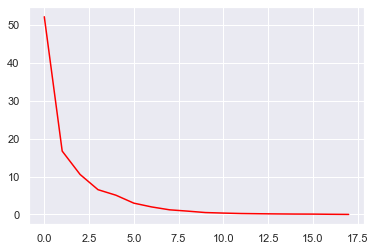

In [123]:
plt.plot(var_exp, color = 'red');

- Visually we can observe that their is a steep drop in variance explained with increase in number of PC's.
- We will proceed with 9 components her. But depending upon requirement of 95% variation or 7 components will also be good. m

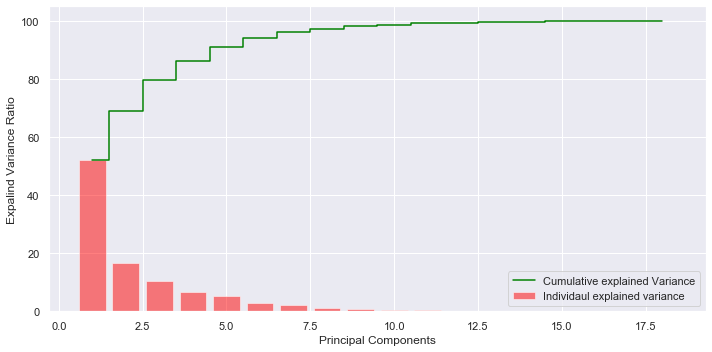

In [121]:
# Scree Plot 
plt.figure(figsize = (10,5))
plt.bar(range(1, e_vals.size +1), var_exp, alpha = 0.5, align = 'center', label = 'Individaul explained variance', color = 'red')
plt.step(range(1, e_vals.size+1), cum_var_exp, where = 'mid', label = 'Cumulative explained Variance', color = 'green')
plt.ylabel('Expalind Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [102]:
# Importing scikit learn PCA.
# It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# Note: We are generating only 9 PCA dimenisons  (Dimensionalaity reduction from 18 to 9)
pca = PCA(n_components = 9)
X_z_PCA = pca.fit_transform(X_z)
X_z_PCA.transpose()

array([[ 3.32393198e-01, -1.59374091e+00,  3.76753509e+00, ...,
         4.80780979e+00, -3.29572788e+00, -4.76673461e+00],
       [-2.18638382e-01, -4.20549398e-01,  1.95040767e-01, ...,
        -1.82373823e-03, -1.00880341e+00,  3.34686477e-01],
       [ 1.00128619e+00, -3.69264301e-01,  8.82372311e-02, ...,
         5.32772800e-01, -3.57467658e-01, -5.68739264e-01],
       ...,
       [-9.02186656e-01,  3.76234233e-01, -3.26422538e-02, ...,
         5.72947835e-01, -2.05108892e-01,  5.72769602e-02],
       [-3.83358279e-01,  2.47624062e-01,  4.83438500e-01, ...,
         1.10917677e-01,  3.19508398e-01, -2.48355712e-01],
       [-8.68964207e-01,  1.46541766e-01, -3.08888459e-01, ...,
        -6.52653571e-01, -2.01552424e-01, -4.31741589e-01]])

In [103]:
pca.components_

array([[ 2.75259459e-01,  2.93392341e-01,  3.04556452e-01,
         2.67593206e-01,  8.04938998e-02,  9.72198560e-02,
         3.16872006e-01, -3.14042361e-01,  3.13953009e-01,
         2.82790417e-01,  3.09310530e-01,  3.14149034e-01,
         2.72002525e-01, -2.09179819e-02,  4.13316728e-02,
         5.83331566e-02,  3.01560495e-02,  7.40813666e-02],
       [-1.27010856e-01,  1.26217125e-01, -7.26862818e-02,
        -1.89635192e-01, -1.22158741e-01,  1.07277825e-02,
         4.80473095e-02,  1.27991503e-02,  6.00351423e-02,
         1.16182501e-01,  6.17536908e-02,  5.32757796e-02,
         2.09279660e-01,  4.88541866e-01, -5.49212020e-02,
        -1.24152855e-01, -5.40947666e-01, -5.40279812e-01],
       [-1.19874162e-01, -2.51835016e-02, -5.60058748e-02,
         2.75066087e-01,  6.42046458e-01,  5.91799912e-01,
        -9.76530949e-02,  5.74645766e-02, -1.09509169e-01,
        -1.69994013e-02,  5.64656174e-02, -1.08711428e-01,
        -3.13685232e-02,  2.86211092e-01, -1.15693651e

#### Finding out correlation between components and features

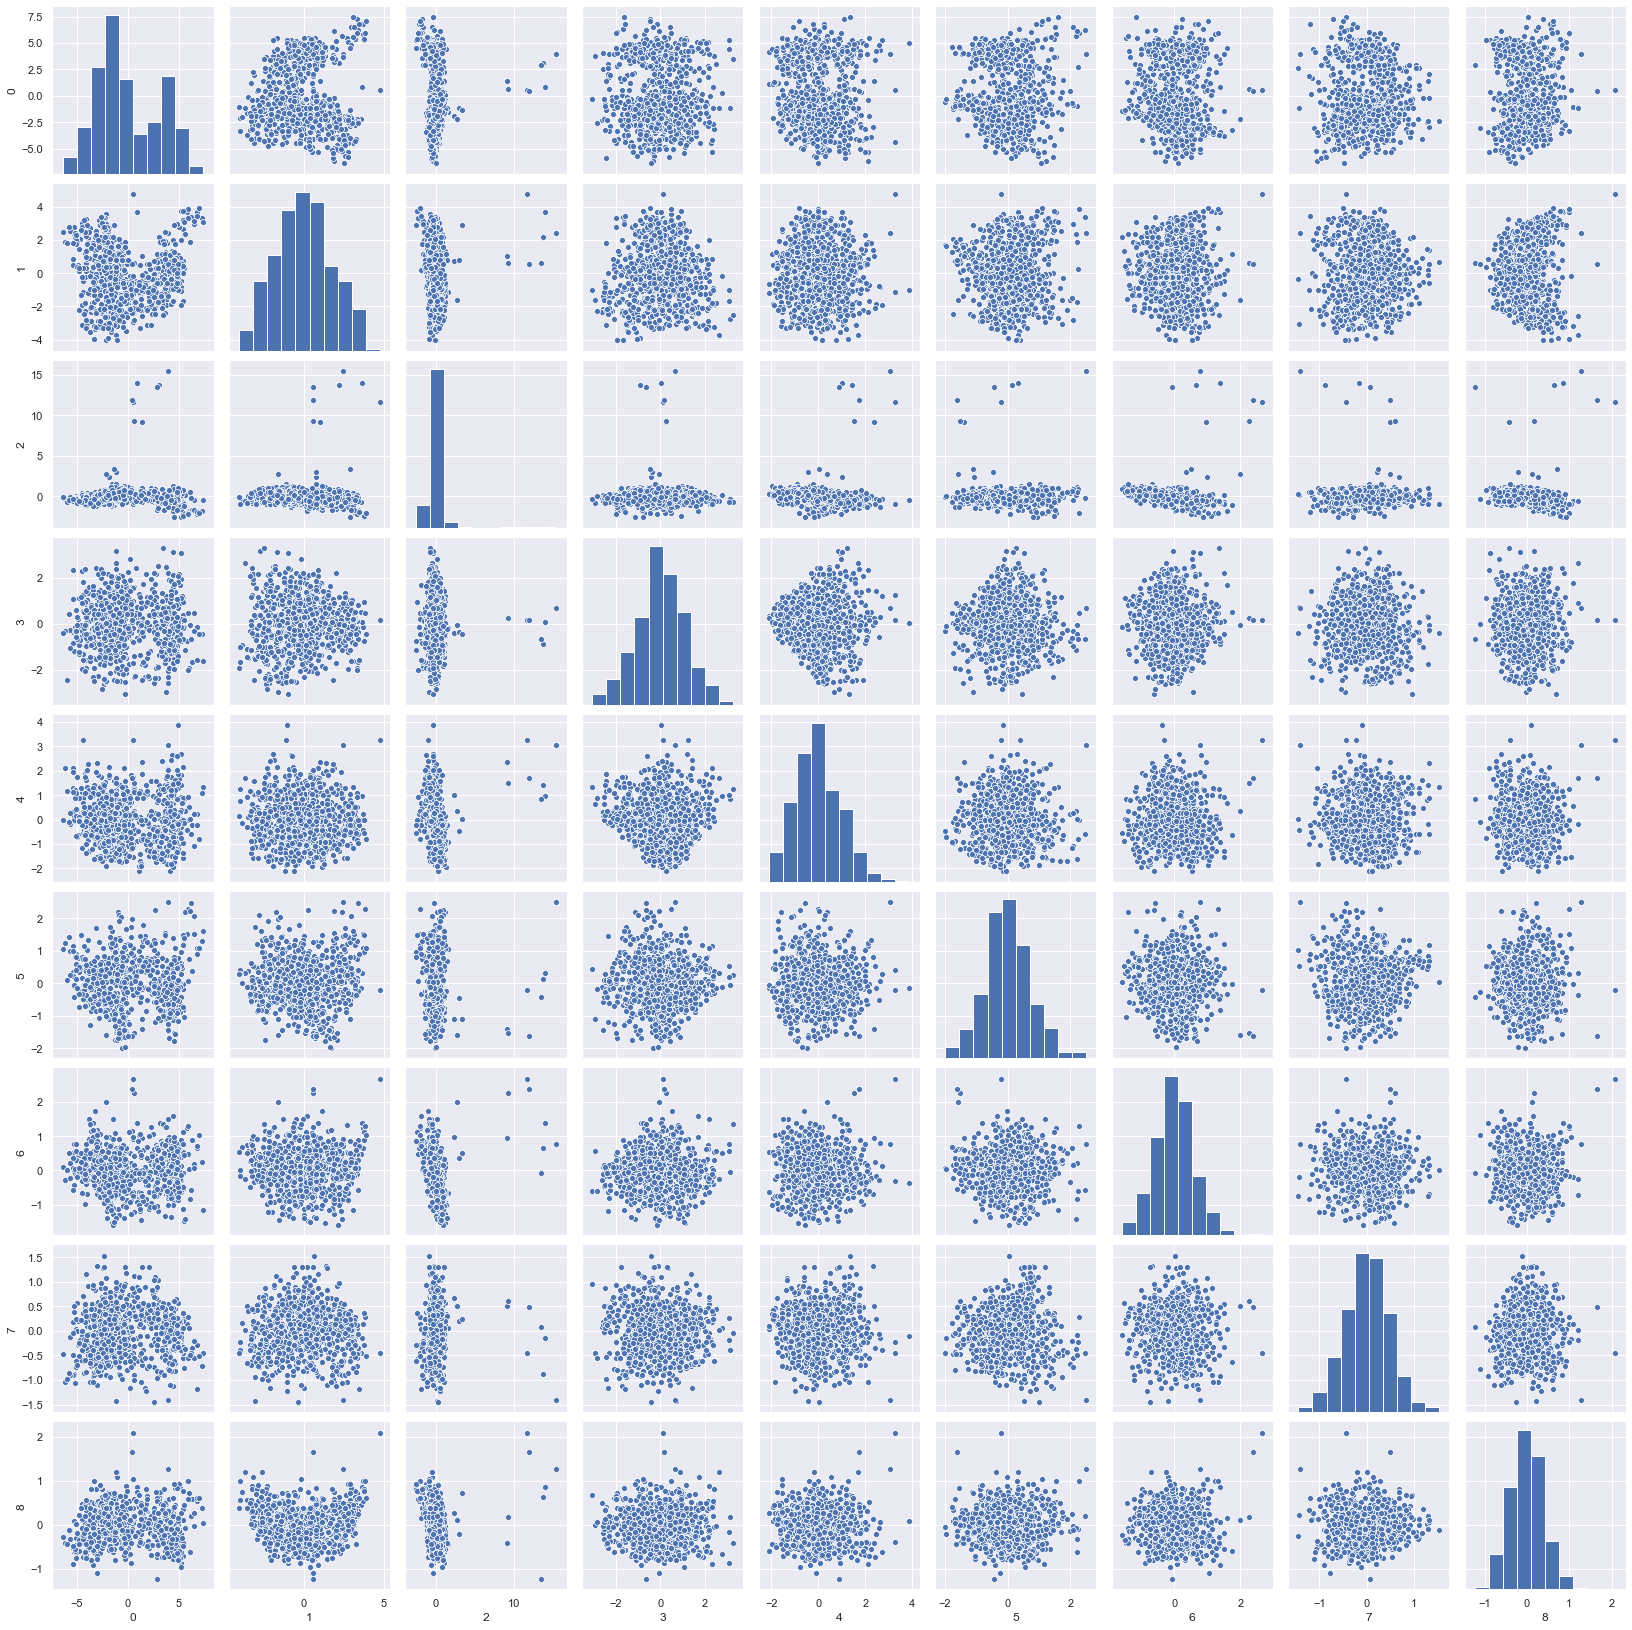

In [104]:
sns.pairplot(pd.DataFrame(X_z_PCA));

<font color = blue>
    
-  A cluster cloud can be seen between all the independent Principal Components, which indicates a generic relationship among the independent variables. 
- Now they have very less collinearity value among them, and they won’t affect the prediction of the target column much.


In [105]:
df_comp = pd.DataFrame(pca.components_, columns = list(X_z))
df_comp.head(3)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.275259     0.293392              0.304556      0.267593   
1    -0.127011     0.126217             -0.072686     -0.189635   
2    -0.119874    -0.025184             -0.056006      0.275066   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0              0.080494                 0.097220       0.316872   
1             -0.122159                 0.010728       0.048047   
2              0.642046                 0.591800      -0.097653   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0      -0.314042                0.313953                   0.282790   
1       0.012799                0.060035                   0.116183   
2       0.057465               -0.109509                  -0.016999   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0         0.309311           0.314149                   0.272003   
1         0.061754           0.053276                   0.209280   
2         0.056466          -0.108711                  -0.031369   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                    -0.020918        0.041332          0.058333   
1                     0.488542       -0.054921         -0.124153   
2                     0.286211       -0.115694         -0.075488   

   skewness_about_2  hollows_ratio  
0          0.030156       0.074081  
1         -0.540948      -0.540280  
2          0.008689       0.039514

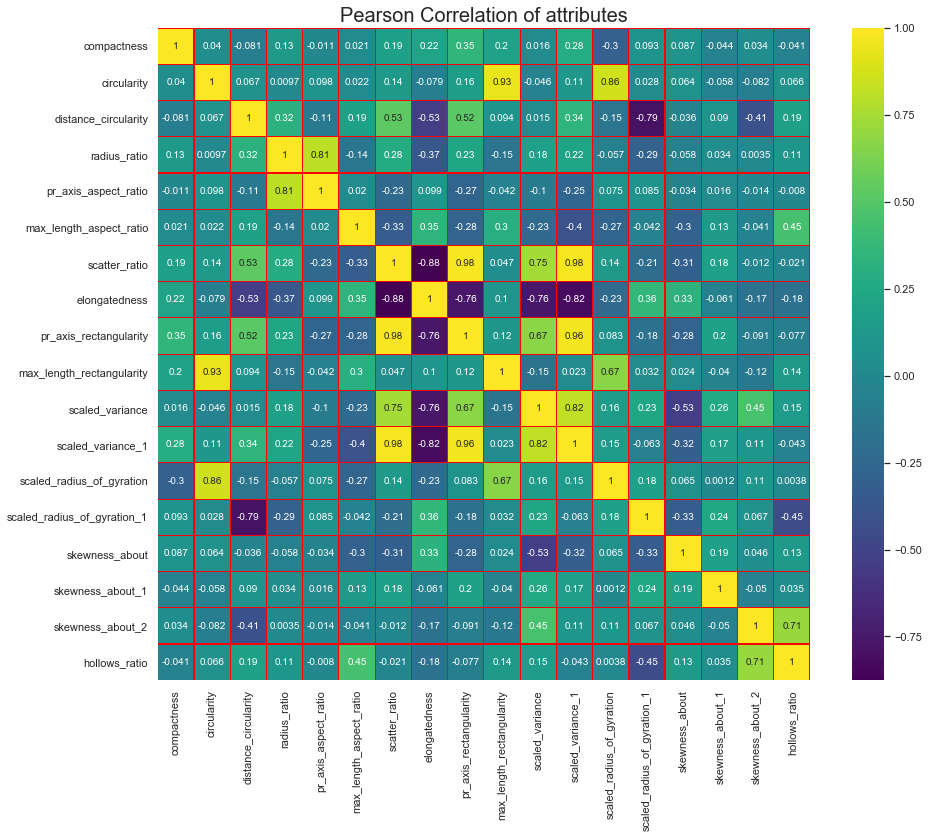

In [106]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize = (15,12))
plt.title('Pearson Correlation of attributes', y=1, size = 20)
sns.heatmap(df_comp.corr(), linewidth = 0.2, vmax = 1.0,
           square = True,  cmap = colormap,linecolor = 'red', annot = True); 

<font color = blue>

- The above heat map correlation graph shows the correlation between columns after imputation of PCA.
- A decrease in correlation value can be observed among columns.


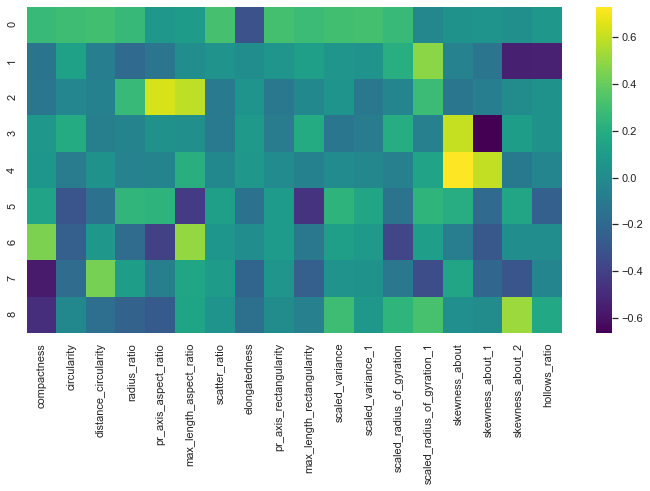

In [107]:
plt.figure(figsize = (12,6))
sns.heatmap(df_comp, cmap = 'viridis');

<font color = blue>

- The above heatmap shows the correlation between Principal Components and the original variables.
-  Except a few boxes, all look like greenish or bluish. It means, a very little correlation can be observed between each other,
- PC no. 4 seems to be more correleated to skewness_about_1 column in a positive manner.
- PC. no. 1 seems to be more correlated to skewnwss_about_2 and hollows_ratio columns in a negative manner. 

In [108]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pd.DataFrame(X_z_PCA), y, test_size = 0.3, random_state = 533)
y_train_pca.head()

499    1.0
412    0.0
506    1.0
71     1.0
430    1.0
Name: class, dtype: float64

In [109]:
x_test_pca.head(3)

0         1         2         3         4         5         6  \
500  4.761235  0.902028  0.107873 -0.600963 -1.286454 -0.858350  0.374260   
251  5.450808  0.727398  0.525361  1.156399 -0.942867 -0.174413 -0.551054   
811 -3.423483  0.360480 -1.198393  1.611314  1.072197  0.391889 -0.290720   

            7         8  
500 -0.044669 -0.045578  
251  0.048138 -0.425844  
811  0.944463  0.180187

In [110]:
# checking the split of data
print('{0:0.2f}% data is in PCA training set'.format((len(x_train_pca)/len(df.index))*100))
print('{0:0.2f}% data is in PCA testing set'.format((len(x_test_pca)/len(df.index))*100))

69.98% data is in PCA training set
30.02% data is in PCA testing set


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   8.b. Model Building and Testing after PCA imputaion
<a id='O4PCASVM'></a>

<font color = violet>
    
### SVM Classifier Model Building and prediction

In [111]:
# Building a Support Vector Machine on trian data
svc_model_rbf_pca = SVC( kernel = 'rbf')
svc_fit_rbf_pca = svc_model_rbf_pca.fit(x_train_pca, y_train_pca)

y_train_pred_svc_rbf_pca = svc_fit_rbf_pca.predict(x_train_pca)

print('Training model Accuracy value after PCA: {0:0.2f}%'.format(accuracy_score(y_train_pca, y_train_pred_svc_rbf_pca)*100.0))

y_test_pred_svc_rbf_pca = svc_fit_rbf_pca.predict(x_test_pca)
print('Testing Model Accuracy value after PCA: {0:0.2f}%'.format(accuracy_score(y_test_pca, y_test_pred_svc_rbf_pca)*100.0))

Training model Accuracy value after PCA: 96.28%
Testing Model Accuracy value after PCA: 95.28%


<font color = violet>
    
### SVM Classifier Confusion Matrix

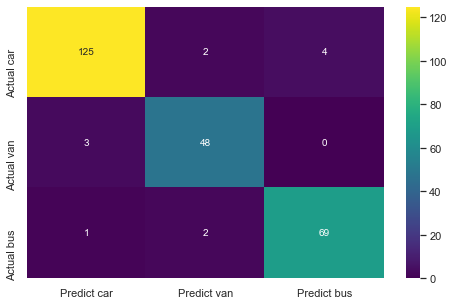

In [112]:
cmSVC_rbf_pca = metrics.confusion_matrix(y_test_pca, y_test_pred_svc_rbf_pca, labels = [1.0,2.0,0.0])
df_cmSVC_rbf_pca = pd.DataFrame(cmSVC_rbf_pca, index = [i for i in ['Actual car', 'Actual van', 'Actual bus']],
                       columns = [i for i in ['Predict car', 'Predict van', 'Predict bus']])
colormap = plt.cm.viridis
plt.figure(figsize = (8,5))
sns.heatmap(df_cmSVC_rbf_pca, annot = True, fmt = 'g', cmap = colormap, linecolor = 'red');

<font color = violet>
    
### SVM Classifier Model Report

In [113]:
print(metrics.classification_report (y_test_pca, y_test_pred_svc_rbf_pca, labels = [1.0,2.0,0.0]))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       131
         2.0       0.92      0.94      0.93        51
         0.0       0.95      0.96      0.95        72

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



In [114]:
tempresultsdf = pd.DataFrame({'Techniques Used': ['SVM after PCA imputation'], 'Accuracy (%)': [accuracy_score(y_test_pca, y_test_pred_svc_rbf_pca).mean()*100], 'Std. Dev (%)': [accuracy_score(y_test_pca, y_test_pred_svc_rbf_pca).std()*100.0] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Techniques Used', 'Accuracy (%)', 'Std. Dev (%)']]
resultsdf

Techniques Used  Accuracy (%)  Std. Dev (%)
0                            SVM with scaling     96.850394      0.000000
0                       SVM Kfold w/o scaling     68.919786      9.150603
0                      SVM Kfold with scaling     96.570410      2.456419
0   SVM after feature elimination w/o scaling     56.299213      0.000000
0  SVM after feature elimination with scaling     95.669291      0.000000
0                    SVM after PCA imputation     95.275591      0.000000

<font color= blue>
    
- After imputation of PCA, the accuracy is observed to be 95.27% 
- This is far better than all others, because it has only taken 8 components to give an accuracy of 95% which is comparatively very less than all other methods we have used to calculate the accuracy.
- Hence, this seems to be more feasible.
- we will also further try to enhance the accuracy by using KFold CV.


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   8.c. Model Building and Testing after PCA imputaion with KFold CV
<a id='O4PCASVMKCV'></a>

<font color = violet>
    
### SVM Classifier

In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 25
seed = 235

kfold_pca = KFold(n_splits = num_folds, random_state = seed)
svc_k_model_pca = SVC ( kernel = 'rbf')
results_pca = cross_val_score(svc_k_model, X_z_PCA, y, cv = kfold)
print(results_pca)
print('\n')
print('Accuracy after performing PCA:%.3f%% (%.3f%%)'%(results_pca.mean()*100.0, results_pca.std()*100.0))


[0.88235294 0.97058824 0.94117647 0.97058824 1.         0.97058824
 0.94117647 0.97058824 0.94117647 1.         0.97058824 0.91176471
 0.94117647 0.97058824 0.97058824 0.97058824 0.94117647 0.94117647
 0.91176471 1.         0.94117647 0.93939394 0.96969697 0.96969697
 0.96969697]


Accuracy after performing PCA:95.629% (2.773%)


In [116]:
tempresultsdf = pd.DataFrame({'Techniques Used': ['SVM after PCA imputation with K-fold'], 'Accuracy (%)': [results_pca.mean()*100], 'Std. Dev (%)': [results_pca.std()*100.0] })
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf = resultsdf[['Techniques Used', 'Accuracy (%)', 'Std. Dev (%)']]
resultsdf

Techniques Used  Accuracy (%)  Std. Dev (%)
0                            SVM with scaling     96.850394      0.000000
0                       SVM Kfold w/o scaling     68.919786      9.150603
0                      SVM Kfold with scaling     96.570410      2.456419
0   SVM after feature elimination w/o scaling     56.299213      0.000000
0  SVM after feature elimination with scaling     95.669291      0.000000
0                    SVM after PCA imputation     95.275591      0.000000
0        SVM after PCA imputation with K-fold     95.629234      2.772908

## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Orange;">   8.d. Observations on Accuracies
<a id='O4O'></a>

<font color = blue>

- After imputation of PCA with KFold CV, the accuracy is observed to be 95.629%, with a standard deviation of 2.77%
- It means the accuracy can range between 92.99% and 98.3% in real.
- This is far better than all others, because it has only taken 8 components to give an accuracy of 95.629% which is comparatively very sound than all other methods we have used to calculate the accuracy.
- Hence, this seems to be more feasible.


## <span style="font-family: Arial; font-weight:bold;font-size:1 em;color:Purple;"> 9.Conclusion 
<a id='C'></a>

In [117]:
resultsdf

Techniques Used  Accuracy (%)  Std. Dev (%)
0                            SVM with scaling     96.850394      0.000000
0                       SVM Kfold w/o scaling     68.919786      9.150603
0                      SVM Kfold with scaling     96.570410      2.456419
0   SVM after feature elimination w/o scaling     56.299213      0.000000
0  SVM after feature elimination with scaling     95.669291      0.000000
0                    SVM after PCA imputation     95.275591      0.000000
0        SVM after PCA imputation with K-fold     95.629234      2.772908

<font color = tiel>

### Comparing Overall Accuracy of various models graphically......

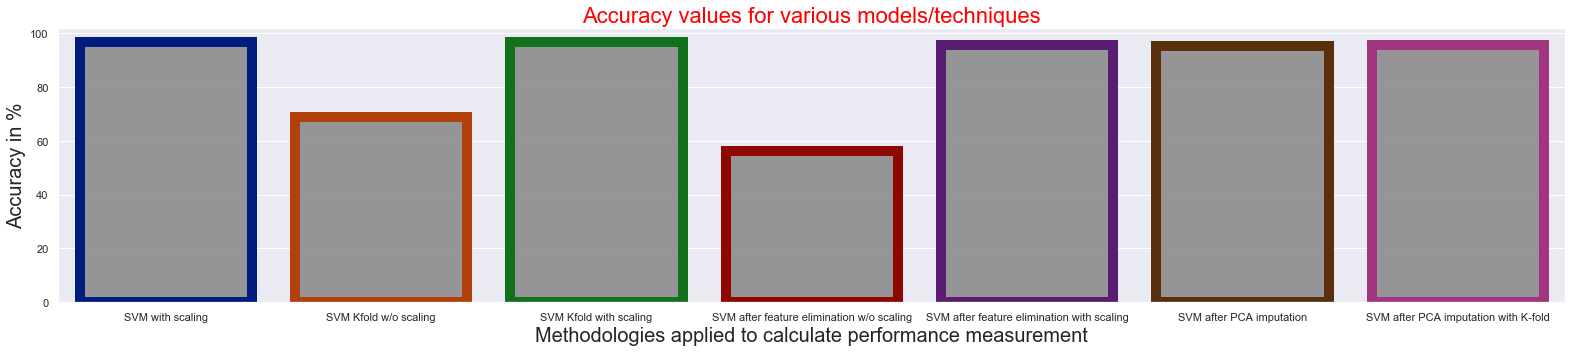

In [118]:
fig = plt.figure(figsize = (22,5))



plt.title ('Accuracy values for various models/techniques',y=1, size = 22, color = 'red')

sns.barplot(y = resultsdf['Accuracy (%)'], x = resultsdf['Techniques Used'], facecolor = (0.5,0.5,0.5,0.8), linewidth = 10, edgecolor = sns.color_palette ('dark', 12) );

plt.ylabel('Accuracy in %', size = 20)
plt.xlabel('Methodologies applied to calculate performance measurement', size = 20)
plt.tight_layout()

<Span style="font-family: Arial;font-size:0.8 em;color:darkgreen;">

- Here we have compared the accuracy scores of SVC models built with raw data and Principal Components.

- The comparison is also drawn among the SVC models built with K-Fold cross validation feature engineering technique.
    

- The inferences are as follows:

<Span style="font-family: Arial;font-size:0.8 em;color:purple;">

> The main point to be considered here is the difference in independent attributes for raw data and Principal components. In raw data we have total 18 number of independent attributes, whereas in case of PCA, we collected total 7 number of independent components which captured about 95% of the variance explained.

> Thus we moved with a little more, by taking an extra attribute, and built the model with total 8 number of PCs or independent columns and subsequently calculated the accuracy.

> The model built with raw data gave an accuracy score of 96.85% and the model built with Principal Components gave an accuracy of 95.27%.

> Similarly we have used K-Fold CV to calculate the accuracy of the models by taking both raw data and Principal Components.

> Hence, we got an accuracy of 68.919% while building the model with raw data without scaling, an accuracy of 96.57% while building the model with raw data after scaling, and got an accuracy of 95.629% while building the model with Principal Components.

> For K-Fold CV, we have taken total 25 number of folds i.e. the value of K as 25. 

> However, any number of value can be taken based upon the number of data points, independent features and our convenience.

> We have also reflected the range estimate values for K-Fold cross validation technique, however, the same was not possible with train test split method so we imitated the point estimate value of accuracy.

> Here, we have also tried to do some feature engineering activities by imputing the process like OLS (Ordinary Least Square) and feature elimination based upon the Correlation value among the columns and p-value of independent columns.

> Thus after imputing the feature elimination process, we eliminated the columns and end up with only 10 columns. So after building the model and testing we achieved the accuracy score of around 56.29% before scaling the dataset and 95.66% after scaling the dataset.

> Thus at the end we can reach out to the conclusion that, the SVC model with PCA and K-Fold has the best accuracy score among all the models. This also gives a range estimate of the accuracy at 95% confidence level.

> It means the accuracy can vary between the standard deviation of 2.77% from both negative and positive sides.

> Since, we have an accuracy score of 95.629 % with corresponding standard deviation value of 2.77% we can give a range estimate of accuracy between 92.505 % and 98.399 %. And this is with a confidence level of 95 %. That means with 95 % of confidence level we can say our model accuracy will be between 92.505 % and 98.399 % in production.

> The cause of considering the above explained model is less number of columns. i.e. with only 8 number of columns it is giving an average accuracy of 95.629 %, and due to the presence of less number of attributes the model is also less complex and least prone to overfitting. Thus, with a very simple model we are achieving the best accuracy score. Hence the SVC model with PCA and K-Fold CV is the best model for production.


## <span style="font-family: Algerian; font-weight:bold;font-size:1 em;color:Red; center">      THE END